![Nuclio logo](https://nuclio.school/wp-content/uploads/2018/12/nucleoDS-newBlack.png)

## 1. Libraries

To start, let's load those libraries that we need

In [1]:
from tensorflow import keras as ks
from matplotlib import pyplot as plt
import numpy as np
import time
import datetime
import pandas as pd
from tensorflow.keras.callbacks import EarlyStopping
import keras.backend as K
from google.colab import drive

## 2. Model network architecture

In [2]:
K.clear_session()

In [ ]:
model = 0

In [ ]:

model = ks.Sequential()

model.add(ks.layers.Conv2D(32, (3, 3), strides=1, activation='relu',
                           padding='same', input_shape=(32,32,3)))
model.add(ks.layers.MaxPooling2D((2, 2)))

model.add(ks.layers.Flatten())
model.add(ks.layers.Dense(32, activation='relu'))
model.add(ks.layers.Dense(10, activation='softmax'))


To review a model, we just have to call the **.Summary()** method of the model

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 32)                262176    
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 263402 (1.00 MB)
Trainable params: 263402 (1.00 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

## 3. Optimizer, error function


In [ ]:
model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## 4. We prepare the data

We load the CIFAR10 data from the datasets directly from the Keras libraries. These are already ready in train and test

**Important detail:**
> The neural network requires that the inputs be real numbers, and we will do it by forcing the division of the values ​​within the 28x28 matrices (which have values​​ from 0 to 255) by 255.0 (a real)

In [3]:
cifar10 = ks.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

170498071/170498071 [==============================] - 4s 0us/step


In [4]:
y_train_label = y_train


We obtain an array with all the labels of CIFAR10

In [5]:
cifar10_labels = [
'airplane', # id 0
'automobile',
'bird',
'cat',
'deer',
'dog',
'frog',
'horse',
'ship',
'truck',
]

print('Number of labels: %s' % len(cifar10_labels))

Number of labels: 10


Let's paint a sample of the images from the CIFAR10 dataset, to see if it looks anything like what we expect.
First, we see what types of data I have, then we map those arrays in a grayscale using the **. Get_cmap ()** method of PlotLy with the first nine numbers of the dataset.

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


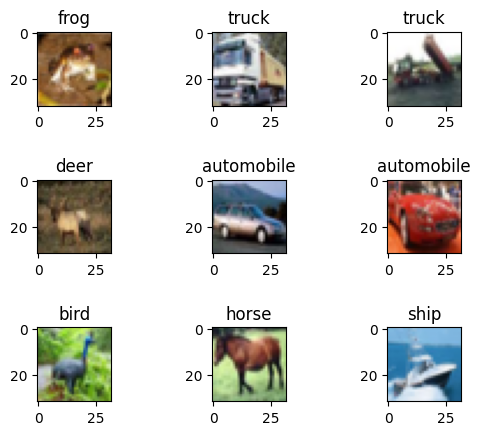

In [6]:
# Lets paint a sample of the images of MNIST

print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

for i in range(9):

    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
    plt.title(cifar10_labels[y_train_label[i,0]])

plt.subplots_adjust(hspace = 1)
plt.show()

We are we going to want to validate while we train (very practical)

In [7]:
x_val = x_train[-10000:]
y_val = y_train[-10000:]

x_train = x_train[:-10000]
y_train = y_train[:-10000]


In [8]:
x_train[0].shape

(32, 32, 3)

When we add convolutions, we need to "pre-treat the data", because **the convolution expects an array of 4 fields** (more like "images"), in the case of MNIST. CIFAR10 already has the right shape, so we don't have to do anything, but as we always say: you better check its size.

Therefore, when exiting the Convolution, you have to do a Flatten, because FullDense layers expect arrays, not matrices !!

Then we print it to see that everything is correct

In [9]:
# We validate the result
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))
print('Validation: X=%s, y=%s' % (x_val.shape, y_val.shape))

Train: X=(40000, 32, 32, 3), y=(40000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)
Validation: X=(10000, 32, 32, 3), y=(10000, 1)


## 5. Training

We can start training the model! Be careful, we have to train against the data converted to the format expected by the Convolution.

We will start with 30 epocs, that is, 30 complete passes of the dataset (which in turn will be with mini-batches internally), setting a batch of 64

The .fit() method also allows us to define if we have several CPUs, GPUs, and if we want to validate data at each end of epoch.

In [ ]:
t = time.perf_counter()

In [ ]:
history = model.fit(x_train, y_train, epochs=20,
                    use_multiprocessing=False, batch_size= 64,
                    validation_data=(x_val, y_val))

Epoch 1/20
625/625 [==============================] - 4s 5ms/step - loss: 1.9146 - accuracy: 0.2970 - val_loss: 1.6593 - val_accuracy: 0.3647
Epoch 2/20
625/625 [==============================] - 3s 5ms/step - loss: 1.5479 - accuracy: 0.4137 - val_loss: 1.4855 - val_accuracy: 0.4380
Epoch 3/20
625/625 [==============================] - 2s 4ms/step - loss: 1.3731 - accuracy: 0.4959 - val_loss: 1.3542 - val_accuracy: 0.5143
Epoch 4/20
625/625 [==============================] - 2s 4ms/step - loss: 1.2714 - accuracy: 0.5378 - val_loss: 1.2703 - val_accuracy: 0.5448
Epoch 5/20
625/625 [==============================] - 3s 5ms/step - loss: 1.2138 - accuracy: 0.5611 - val_loss: 1.2333 - val_accuracy: 0.5643
Epoch 6/20
625/625 [==============================] - 3s 5ms/step - loss: 1.1594 - accuracy: 0.5817 - val_loss: 1.1994 - val_accuracy: 0.5749
Epoch 7/20
625/625 [==============================] - 3s 5ms/step - loss: 1.1254 - accuracy: 0.5911 - val_loss: 1.1900 - val_accuracy: 0.5735
Epoch 

In [ ]:
elapsed_time = datetime.timedelta(seconds=(time.perf_counter() - t))

print('Training time:', elapsed_time)

Training time: 0:01:28.995177


## 6. We evaluate the results

Let's obtain a graph of how the error and the accuracy evolve in each epoch in the training data and in the validation

In [ ]:
model_accuracies = {}

In [ ]:
_, acc = model.evaluate(x_test, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))
model_accuracies['base_model'] = acc
accuracy_matrix = np.array(list(model_accuracies.values()))
print(accuracy_matrix)



> 59.620
[0.59619999]


In [ ]:
model_names = ['Base Model']
accuracy_values = accuracy_matrix.reshape(-1)
comparison_dataframe = pd.DataFrame({'Model Name': model_names, 'Accuracy': accuracy_values})
comparison_dataframe

,Model Name,Accuracy
0,Base Model,0.5962


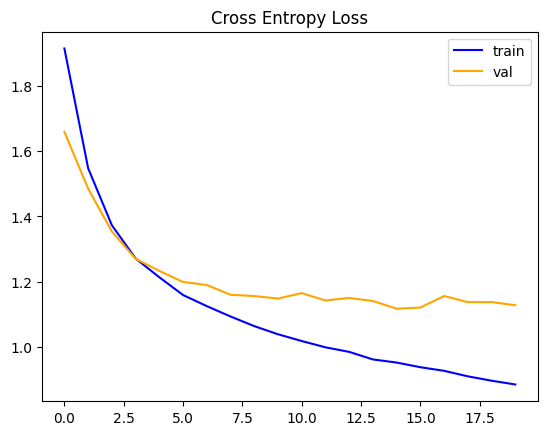

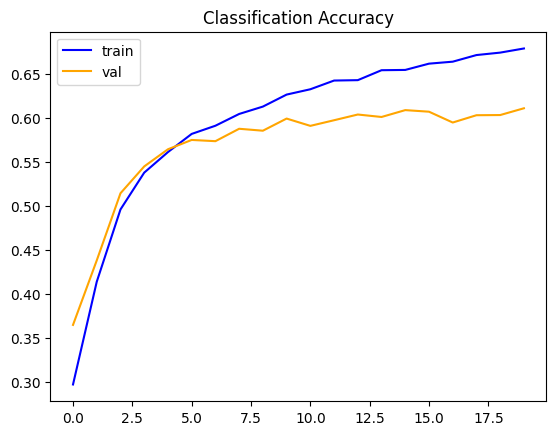

In [ ]:
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='val')
plt.legend()
plt.show()

plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='val')
plt.legend()
plt.show()

The cost we can see that it is stable and it is in the epoch 15 that it is set at a value. Also the accuracy dances around 0.10. It cannot be said that it is a very good model and the gap between training set accuracy and validation set accuracy become wider and wider at the end.

Let's see what kind of predictions I'm getting about the test set (let's paint the images and their classifications)

In [ ]:
predictions = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


One of the advantages of Python is that there are loads of functions and code made by third parties. Here I have shot some nice functions (which I have adapted a bit to my needs) to be able to paint the images, their label (ground truth) and the classifications that we have made.

In [10]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label[0]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label[0]].set_color('blue')

We draw the first images, with the predictions and their real values ​​(a total of 20 images, so as not to abuse your laptops)

We color the correct predictions in blue and the failures in red. Although I have printed the labels first so that we have a reference to the graphic.

0 airplane
1 automobile
2 bird
3 cat
4 deer
5 dog
6 frog
7 horse
8 ship
9 truck


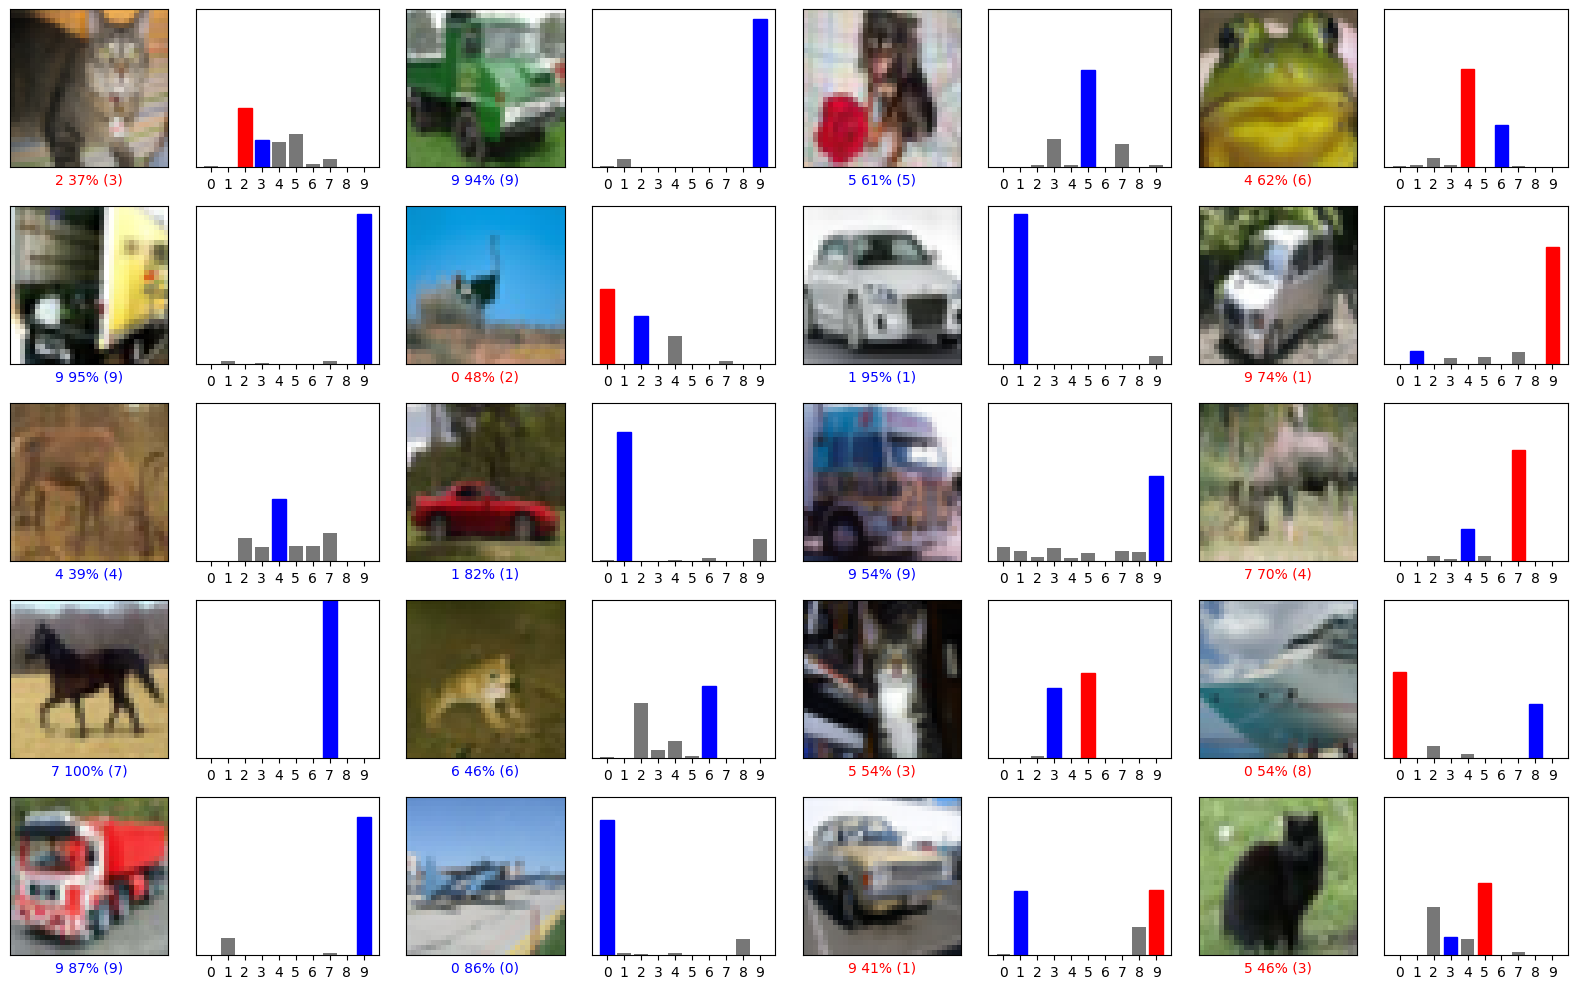

In [ ]:
i = 0
for l in cifar10_labels:
    print(i, l)
    i += 1

num_rows = 5
num_cols = 4
start = 650
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i+start, predictions[i+start], y_test, x_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i+start, predictions[i+start], y_test)
plt.tight_layout()
plt.show()

## 7. We save the model for future evaluations

Go changing the names of the file to save the various projects.
Here we save it in "local", but remember that the ideal is that you save it in Google Drive (you have to mount the unit, set the path and save the .h5 model there)

In [ ]:
model.save('cifar10_base_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


I am going to do the following and see how my experiments going:
1. Model 1: Adding a convolution layer and early stopper to stop overfitting as the number of data point s is quite small and when we add convolutions and make our model more complicated it is more likely to become overfitted.
2. Model 2: Added Dropout and BatchNormalization(): to make the model recognize more patterns
3. Model 3: Add two convolution layer
4. Model 4: deeper convolution filters
5. Model 5: Deeper Dense layer and additional dropouts
6. Model 6: More Complex adding two conv 128
7.Play With learning rate: Model 6: Learning scheduler
8. Model 7: Make the first two convolutions 32 with learning scheduler


### Model 1: Convolution and early stopper

**1. Adding a convolution layer +overfitting stopper
this is the first layer of VGG and adding early stopper. Then I am going to save the accuracy on validation set in a matrics.**

In [ ]:
K.clear_session()

In [ ]:
model_1_conv_ES=0

In [ ]:

model_1_conv_ES = ks.Sequential()

model_1_conv_ES.add(ks.layers.Conv2D(32, (3, 3), strides=1, activation='relu', 
                           padding='same', input_shape=(32,32,3)))

model_1_conv_ES.add(ks.layers.Conv2D(32, (3, 3), strides=1, activation='relu', # add a convolution layer
                           padding='same', input_shape=(32,32,3)))
model_1_conv_ES.add(ks.layers.MaxPooling2D((2, 2)))

model_1_conv_ES.add(ks.layers.Flatten())
model_1_conv_ES.add(ks.layers.Dense(32, activation='relu'))
model_1_conv_ES.add(ks.layers.Dense(10, activation='softmax'))

In [ ]:
model_1_conv_ES.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 32)                262176    
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                        

**Conv2D layer (conv2d_3)**:This layer applies 32 filters of (3,3) to the input image :
Number of parameters=(filter width×filter height×input channels+1)×number of filters
Here, the additional 1 is for the bias term associated with each filter. Plugging in the values:
Number of parameters=(3×3×3+1)×32=(27+1)×32=28×32=896

**conv2d_4 (Conv2D)**:Similar to the previous layer, this layer applies another set of 32 filters of size (3, 3) to the input image, resulting in 32 output channels. The total number of parameters in this layer is 9248.
 Number of parameters=(3×3×32+1)×32=(288+1)×32=289×32=9248

3×3×32 represents the weights per filter for the 32 input channels.
still have 32 filters
+1 is for the bias term per filter.
9248 is the total number of parameters.

**MaxPooling2D layer (max_pooling2d_2)**:

Output shape: (None, 16, 16, 32)
This layer performs max pooling with a pool size of (2, 2), reducing the spatial dimensions of the input by half along both the height and width dimensions.

**Flatten layer (flatten_2)**:

Output shape: (None, 8192)
This layer flattens the 3D output from the convolutional and pooling layers into a 1D array, preparing it for input to the dense layers.

**Dense layer (dense_4)**:

Output shape: (None, 32)
Number of parameters: 262176
This layer is a fully connected dense layer with 32 units and ReLU activation function.
(8192×32)+32 represents the weights from the flattened input to the 32 units.
+32 is for the bias term for each unit.
262176
262176 is the total number of parameters.

**Dense layer (dense_5)**:

Output shape: (None, 10)
Number of parameters: 330
This layer is the output layer with 10 units (corresponding to the 10 classes in CIFAR-10) and softmax activation function.
(10x32) +10 = 330

Optimizer is the same as the base model Adam
for classifying images we are going to use Sparse Categorical Crosstentropy
and the matrics we are going to evaluate our model is accuracy

In [ ]:
model_1_conv_ES.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'], )

We have the same train and evaluation and test sets. Let's load them


Train: X=(40000, 32, 32, 3), y=(40000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


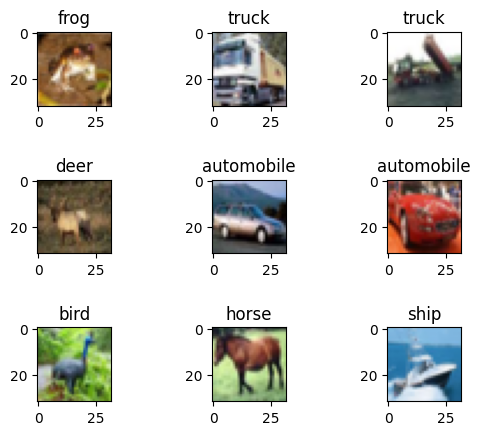

In [ ]:
# Lets paint a sample of the images of MNIST

print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

for i in range(9):

    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
    plt.title(cifar10_labels[y_train_label[i,0]])

plt.subplots_adjust(hspace = 1)
plt.show()

In [ ]:
# We validate the result
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))
print('Validation: X=%s, y=%s' % (x_val.shape, y_val.shape))

Train: X=(40000, 32, 32, 3), y=(40000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)
Validation: X=(10000, 32, 32, 3), y=(10000, 1)


**Training**
We can start training the model! 
First, I define the callback and early stopping then I am going to train the model.


In [ ]:
callback_loss = EarlyStopping(monitor='val_loss', patience=5)
callback_accuracy = EarlyStopping(monitor='val_accuracy', patience=5)

### Train the model

In [ ]:
t = time.perf_counter()

In [ ]:
history = model_1_conv_ES.fit(x_train, y_train, epochs=20,
                    use_multiprocessing=False, batch_size= 64,
                    validation_data=(x_val, y_val),
                     callbacks=[callback_accuracy, callback_loss])    # early stopper call back

Epoch 1/20
625/625 [==============================] - 6s 7ms/step - loss: 1.5106 - accuracy: 0.4543 - val_loss: 1.2974 - val_accuracy: 0.5339
Epoch 2/20
625/625 [==============================] - 3s 5ms/step - loss: 1.1166 - accuracy: 0.6043 - val_loss: 1.0990 - val_accuracy: 0.6203
Epoch 3/20
625/625 [==============================] - 3s 5ms/step - loss: 0.9752 - accuracy: 0.6600 - val_loss: 1.0102 - val_accuracy: 0.6498
Epoch 4/20
625/625 [==============================] - 3s 5ms/step - loss: 0.8839 - accuracy: 0.6873 - val_loss: 0.9807 - val_accuracy: 0.6616
Epoch 5/20
625/625 [==============================] - 4s 6ms/step - loss: 0.8223 - accuracy: 0.7137 - val_loss: 0.9790 - val_accuracy: 0.6655
Epoch 6/20
625/625 [==============================] - 3s 5ms/step - loss: 0.7638 - accuracy: 0.7333 - val_loss: 0.9872 - val_accuracy: 0.6647
Epoch 7/20
625/625 [==============================] - 3s 5ms/step - loss: 0.7079 - accuracy: 0.7546 - val_loss: 0.9908 - val_accuracy: 0.6714
Epoch 

In [ ]:
elapsed_time = datetime.timedelta(seconds=(time.perf_counter() - t))

print('Training time:', elapsed_time)

Training time: 0:00:43.911045


In [ ]:
model_accuracies = {}
_, acc = model_1_conv_ES.evaluate(x_test, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))
model_accuracies['Add One layer convolution + Early Stopper'] = acc
accuracy_matrix = np.array(list(model_accuracies.values()))
print(accuracy_matrix)


> 65.130
[0.65130001]


In [ ]:
comparison_dataframe

,Model Name,Accuracy
0,Base Model,0.5962


In [ ]:
new_row = {'Model Name': 'Add Convolution and early stopper', 'Accuracy': acc}
comparison_dataframe = comparison_dataframe.append(new_row, ignore_index=True)


<ipython-input-117-24fa54f3c160>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comparison_dataframe = comparison_dataframe.append(new_row, ignore_index=True)


In [ ]:
comparison_dataframe

,Model Name,Accuracy
0,Base Model,0.5962
1,Add Convolution and early stopper,0.6513


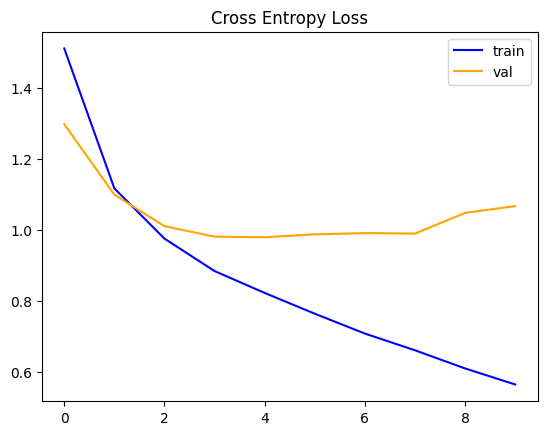

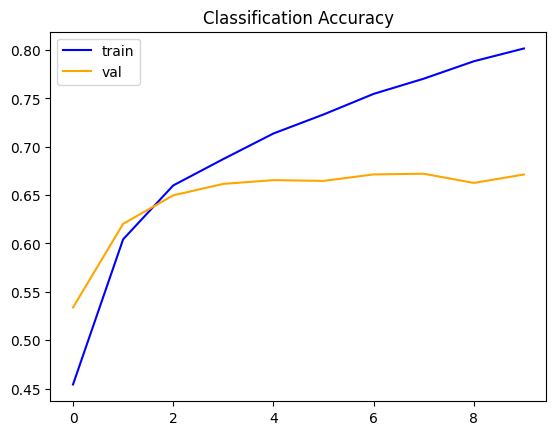

In [ ]:
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='val')
plt.legend()
plt.show()

plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='val')
plt.legend()
plt.show()

We can see the on antropy loss become smoother in this type of network especially after adding the stopper without fluctuations. we can see the cost becomes stable and it is in the epoch 8 that it is set at a value (compare to 15 epochs in previous model). We can see that accuracy become stable after 8 epocs on average This is better model than the previous one but not the best. The network is still so simple.

Let's see what kind of predictions the model will get on the test set (let's paint the images and their classifications)

In [ ]:
predictions = model_1_conv_ES.predict(x_test)

313/313 [==============================] - 1s 2ms/step


0 airplane
1 automobile
2 bird
3 cat
4 deer
5 dog
6 frog
7 horse
8 ship
9 truck


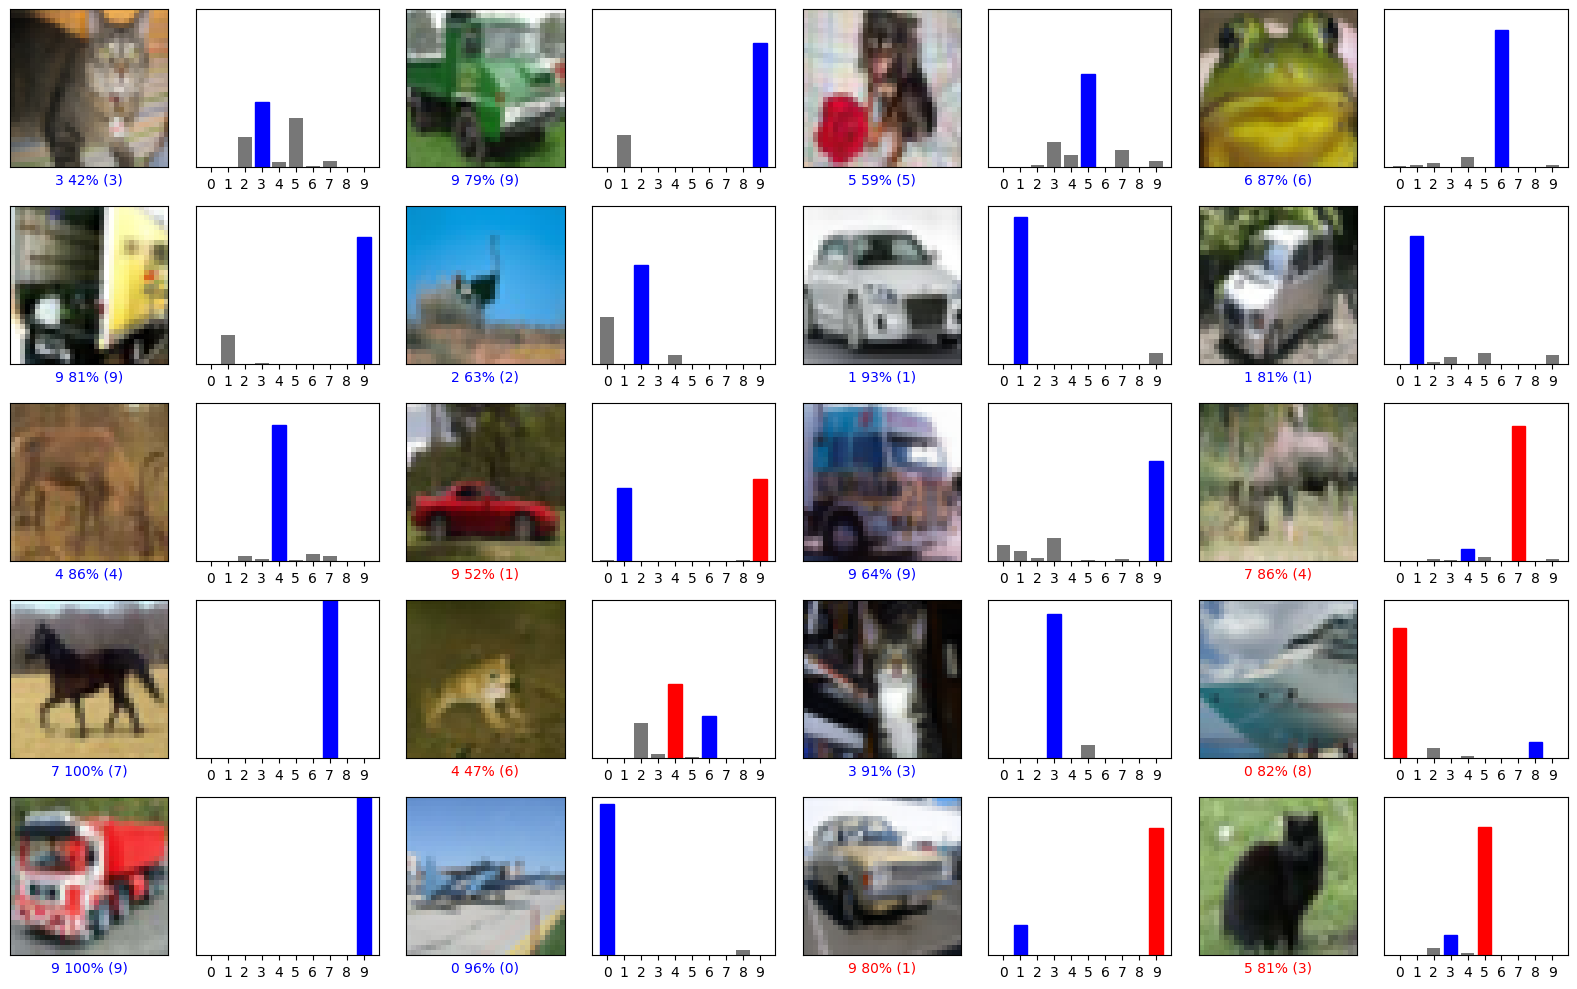

In [ ]:
i = 0
for l in cifar10_labels:
    print(i, l)
    i += 1

num_rows = 5
num_cols = 4
start = 650
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i+start, predictions[i+start], y_test, x_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i+start, predictions[i+start], y_test)
plt.tight_layout()
plt.show()

It seems in general the error becomes less. By this I mean in some cases the percentage confidence level of the answer increases when it is right  and the wrong recognition confidence level decreases Or with the right answers in some cases like the frog that in the base model recognized as bird by 62% and in  model with additional convolution layer it recognizes it as frog with 87% confidence level.


In [ ]:
comparison_dataframe

,Model Name,Accuracy
0,Base Model,0.5962
1,Add Convolution and early stopper,0.6513


In [ ]:
drive.mount('/content/drive')

comparison_dataframe.to_csv('/content/drive/My Drive/path_to_save/comparison_dataframe.csv', index=False)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
comparison_dataframe = pd.read_csv('/content/drive/My Drive/path_to_save/comparison_dataframe.csv')
comparison_dataframe

,Model Name,Accuracy
0,Base Model,0.5962
1,Add Convolution and early stopper,0.6513


### Model 2: Added Dropout and BatchNormalization()

In [ ]:
K.clear_session()
model_2_dropout_BNorm=0


In [ ]:

model_2_dropout_BNorm = ks.Sequential()
model_2_dropout_BNorm.add(ks.layers.Conv2D(32, (3, 3), strides=1, activation='relu',
                                     padding='same', input_shape=(32,32,3)))
model_2_dropout_BNorm.add(ks.layers.BatchNormalization())
model_2_dropout_BNorm.add(ks.layers.Conv2D(32, (3, 3), strides=1, activation='relu',
                                     padding='same'))
model_2_dropout_BNorm.add(ks.layers.BatchNormalization())
model_2_dropout_BNorm.add(ks.layers.MaxPooling2D((2, 2)))
model_2_dropout_BNorm.add(ks.layers.Dropout(0.4))
model_2_dropout_BNorm.add(ks.layers.Flatten())
model_2_dropout_BNorm.add(ks.layers.Dense(32, activation='relu'))
model_2_dropout_BNorm.add(ks.layers.Dense(10, activation='softmax'))


Let's describe the added sections in this model in compare to the previous model:
I added drop out and regulation to make the model more stable and prevent it from overfitting. as I am also going to add few convultion layers and make the layers denser I need first this to be implemented then make my model complex.

**Drop Out** : In this technique I am going to turn few nodes (40% of the nodes off = set them to zero) randomly during each iteration which helps prevent the network from relying too much on specific inputs and reduces the risk of overfitting.

**Batch Normalization**: This layer is going to normalize the inputs of each layer, which helps speed up training and makes the model more stable.
let's apply and see the performance:

In [ ]:
model_2_dropout_BNorm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                        

**BatchNormalization layers**: After each Conv2D layer, there is a BatchNormalization layer. Batch normalization normalizes the output of the previous layer, helping with training stability and speed. Each BatchNormalization layer has 32 parameters.Since the batch normalization are applied to 32 feature maps, each with a size of 32x32, there are 128 scaling and shifting parameters in each batch normalization layer (32 feature maps * 2 parameters per feature map = 64 parameters for scaling and 64 parameters for shifting, totaling 128 parameters).

**Drop out**
This layer is just because the dropout layer is only a regularization technique to set fraction of input nodes to zero during training and it only affects the model during training - all the units are used and this layer doesn't have any trainable parameter itself.
the batch normalization parameters are non-trainable and that's why the non-trainable is 128.

In [ ]:
model_2_dropout_BNorm.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'], )

In [ ]:
# We validate the result
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))
print('Validation: X=%s, y=%s' % (x_val.shape, y_val.shape))

Train: X=(40000, 32, 32, 3), y=(40000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)
Validation: X=(10000, 32, 32, 3), y=(10000, 1)


In [ ]:
callback_loss = EarlyStopping(monitor='val_loss', patience=5)
callback_accuracy = EarlyStopping(monitor='val_accuracy', patience=5)

In [ ]:
t = time.perf_counter()

In [ ]:
history =model_2_dropout_BNorm.fit(x_train, y_train, epochs=20,
                    use_multiprocessing=False, batch_size= 64,
                    validation_data=(x_val, y_val),
                     callbacks=[callback_accuracy, callback_loss])    # early stopper call back

Epoch 1/20
625/625 [==============================] - 7s 8ms/step - loss: 1.6400 - accuracy: 0.4128 - val_loss: 1.4367 - val_accuracy: 0.4959
Epoch 2/20
625/625 [==============================] - 4s 7ms/step - loss: 1.1943 - accuracy: 0.5763 - val_loss: 1.2641 - val_accuracy: 0.5525
Epoch 3/20
625/625 [==============================] - 5s 7ms/step - loss: 1.0346 - accuracy: 0.6325 - val_loss: 1.1576 - val_accuracy: 0.5996
Epoch 4/20
625/625 [==============================] - 5s 8ms/step - loss: 0.9408 - accuracy: 0.6670 - val_loss: 1.0022 - val_accuracy: 0.6502
Epoch 5/20
625/625 [==============================] - 5s 7ms/step - loss: 0.8749 - accuracy: 0.6872 - val_loss: 1.0315 - val_accuracy: 0.6359
Epoch 6/20
625/625 [==============================] - 5s 8ms/step - loss: 0.8294 - accuracy: 0.7097 - val_loss: 1.0228 - val_accuracy: 0.6531
Epoch 7/20
625/625 [==============================] - 5s 7ms/step - loss: 0.7886 - accuracy: 0.7237 - val_loss: 0.9579 - val_accuracy: 0.6767
Epoch 

In [ ]:
elapsed_time = datetime.timedelta(seconds=(time.perf_counter() - t))

print('Training time:', elapsed_time)

Training time: 0:01:21.060045


In [ ]:
model_accuracies = {}
_, acc = model_2_dropout_BNorm.evaluate(x_test, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))
model_accuracies['Dropout + Batch Normalization'] = acc
accuracy_matrix = np.array(list(model_accuracies.values()))
print(accuracy_matrix)


> 68.920
[0.68919998]


In [ ]:
comparison_dataframe

,Model Name,Accuracy
0,Base Model,0.5962
1,Add Convolution and early stopper,0.6513


In [ ]:
new_row = {'Model Name': 'Add dropout and batch normalizer', 'Accuracy': acc}
comparison_dataframe = comparison_dataframe.append(new_row, ignore_index=True)

<ipython-input-136-4c35f5b76232>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comparison_dataframe = comparison_dataframe.append(new_row, ignore_index=True)


In [ ]:
comparison_dataframe

,Model Name,Accuracy
0,Base Model,0.5962
1,Add Convolution and early stopper,0.6513
2,Add dropout and batch normalizer,0.6892


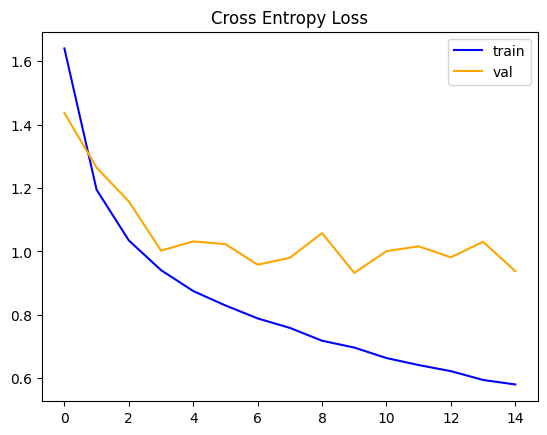

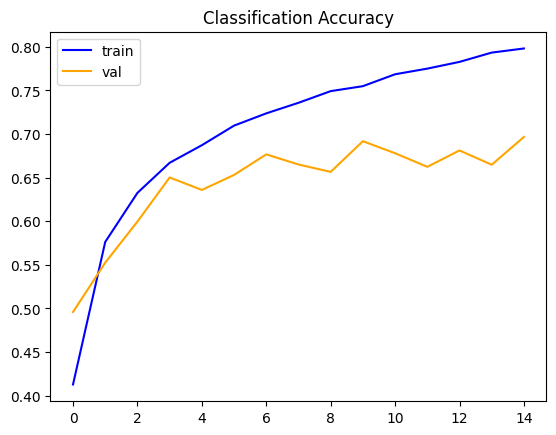

In [ ]:
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='val')
plt.legend()
plt.show()

plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='val')
plt.legend()
plt.show()

We can see that this model does a lot better on test set. As we look at the antropy loss on test set decreases from 1.1 in the added convolution model to 0.95 in added dropout and batchnormalizer. the dropouts is the cause of fluctuations in both plots however as time passes it stops at the optimized level which is 70% accuracy level and 0.96 loss on epoc 14 while the previous model stops at epoc 9 with loss=1.1 and accuracy=66% on validation set. Drop out let the network becomes overfitted later and let the model train for longer properly with generalization power.
Batch normalization can help improve the generalization of the model by reducing internal covariate shift. This can lead to more stable and consistent improvements in accuracy over time. However, there are fluctuations, as the network adapts to the normalized inputs.It can help stabilize the training process by ensuring that the inputs to each layer are normalized. This can lead to more stable and consistent decreases in loss over time. However, there are still fluctuations, especially in the  training, as the network adapts to the normalized inputs and drop outs.

In [ ]:
predictions = model_2_dropout_BNorm.predict(x_test)

313/313 [==============================] - 1s 2ms/step


0 airplane
1 automobile
2 bird
3 cat
4 deer
5 dog
6 frog
7 horse
8 ship
9 truck


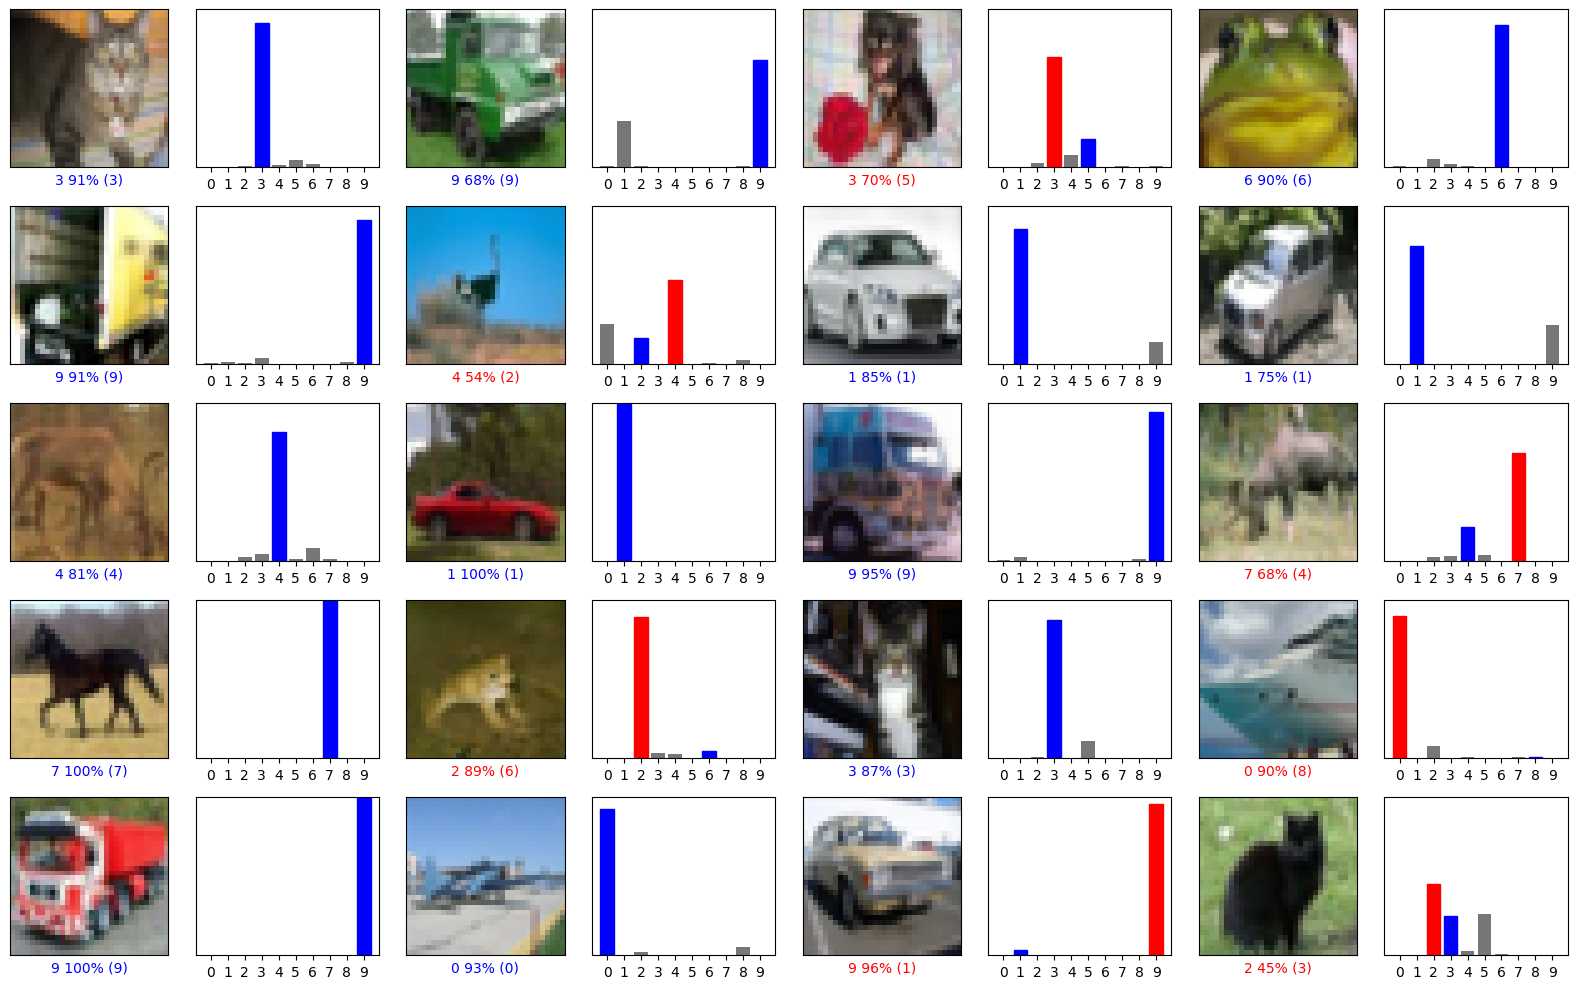

In [ ]:
i = 0
for l in cifar10_labels:
    print(i, l)
    i += 1

num_rows = 5
num_cols = 4
start = 650
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i+start, predictions[i+start], y_test, x_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i+start, predictions[i+start], y_test)
plt.tight_layout()
plt.show()

(I know this is only the first 20 images on the test set but still it is a good point to check the imrovements)We can see the overall performance improved. The overall confidence level of the answers on the first columns increase. on second column: it increases the confidence levela with the right answer in the car image as compare to the wrogn answer in added convolution layer model. Hoever, it got the  second image wrong. These are just examples of how accuracy changed. In the third column it increases the confidence level of both wrong and right answers and got one wrong answer that in the previous model got it right.

In [ ]:
comparison_dataframe

,Model Name,Accuracy
0,Base Model,0.5962
1,Add Convolution and early stopper,0.6513
2,Add dropout and batch normalizer,0.6892


In [ ]:
comparison_dataframe.to_csv('/content/sample_data/comparison_dataframe.csv', index=False)
comparison_dataframe= pd.read_csv('/content/sample_data/comparison_dataframe.csv')

### Model 3: Add two convolution layer

In [ ]:
K.clear_session()
model_3_dropout_BNorm_2conv=0

In [ ]:
model_3_dropout_BNorm_2conv= ks.Sequential()
model_3_dropout_BNorm_2conv.add(ks.layers.Conv2D(32, (3, 3), strides=1, activation='relu',
                                     padding='same', input_shape=(32,32,3)))
model_3_dropout_BNorm_2conv.add(ks.layers.BatchNormalization())
model_3_dropout_BNorm_2conv.add(ks.layers.Conv2D(32, (3, 3), strides=1, activation='relu',
                                     padding='same'))
model_3_dropout_BNorm_2conv.add(ks.layers.BatchNormalization())
model_3_dropout_BNorm_2conv.add(ks.layers.Conv2D(64, (3, 3), strides=1, activation='relu',
                                     padding='same'))
model_3_dropout_BNorm_2conv.add(ks.layers.BatchNormalization())
model_3_dropout_BNorm_2conv.add(ks.layers.Conv2D(64, (3, 3), strides=1, activation='relu',
                                     padding='same'))
model_3_dropout_BNorm_2conv.add(ks.layers.BatchNormalization())
model_3_dropout_BNorm_2conv.add(ks.layers.MaxPooling2D((2, 2)))
model_3_dropout_BNorm_2conv.add(ks.layers.Dropout(0.4))
model_3_dropout_BNorm_2conv.add(ks.layers.Flatten())
model_3_dropout_BNorm_2conv.add(ks.layers.Dense(32, activation='relu'))
model_3_dropout_BNorm_2conv.add(ks.layers.Dense(10, activation='softmax'))


Let's describe the added sections in this model in compare to the previous model: I simply added two other convultion layers to detect more complex patterns. However, as it make the model prone to overfitting, I would do this after implementing enough overfitting stopper modules in the model. Let's see how the accuracy improves. Frist, Let's see the summary:

In [ ]:
model_3_dropout_BNorm_2conv.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_4 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_5 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 batch_normalization_6 (Bat  (None, 32, 32, 64)       

We can see two layers of convolution size 64 with batch normalizers added :
conv2d_6: Convolutional layer with 64 filters of size 3x3, producing an output shape of (None, 32, 32, 64). It has 18,496 parameters.
batch_normalization_6: Batch normalization layer after conv2d_6 with 256 parameters, normalizing its outputs.
conv2d_7: Convolutional layer with 64 filters of size 3x3, producing an output shape of (None, 32, 32, 64). It has 36,928 parameters.
So the total parameters are now 2.16 of the previous one rising from  from 272906 to  590986 and that's including two batch normalizer of 256, and two convolution layers of 64. Let's see how these two added layers and complex model detect more details and learn unknown general patterns.

In [ ]:
model_3_dropout_BNorm_2conv.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'], )

In [ ]:
# We validate the result
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))
print('Validation: X=%s, y=%s' % (x_val.shape, y_val.shape))

Train: X=(40000, 32, 32, 3), y=(40000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)
Validation: X=(10000, 32, 32, 3), y=(10000, 1)


In [ ]:
callback_loss = EarlyStopping(monitor='val_loss', patience=5)
callback_accuracy = EarlyStopping(monitor='val_accuracy', patience=5)

In [ ]:
t = time.perf_counter()

In [ ]:
history =model_3_dropout_BNorm_2conv.fit(x_train, y_train, epochs=20,
                    use_multiprocessing=False, batch_size= 64,
                    validation_data=(x_val, y_val),
                     callbacks=[callback_accuracy, callback_loss])    # early stopper call back

Epoch 1/20
625/625 [==============================] - 17s 20ms/step - loss: 2.0292 - accuracy: 0.2729 - val_loss: 1.9382 - val_accuracy: 0.3349
Epoch 2/20
625/625 [==============================] - 11s 18ms/step - loss: 1.4418 - accuracy: 0.4685 - val_loss: 1.3551 - val_accuracy: 0.5124
Epoch 3/20
625/625 [==============================] - 12s 20ms/step - loss: 1.2025 - accuracy: 0.5521 - val_loss: 1.2567 - val_accuracy: 0.5437
Epoch 4/20
625/625 [==============================] - 12s 18ms/step - loss: 1.0655 - accuracy: 0.6068 - val_loss: 1.2012 - val_accuracy: 0.5764
Epoch 5/20
625/625 [==============================] - 12s 18ms/step - loss: 0.9691 - accuracy: 0.6459 - val_loss: 1.1510 - val_accuracy: 0.5945
Epoch 6/20
625/625 [==============================] - 12s 20ms/step - loss: 0.8800 - accuracy: 0.6830 - val_loss: 1.0339 - val_accuracy: 0.6325
Epoch 7/20
625/625 [==============================] - 12s 19ms/step - loss: 0.7950 - accuracy: 0.7181 - val_loss: 0.9193 - val_accuracy:

In [ ]:
elapsed_time = datetime.timedelta(seconds=(time.perf_counter() - t))

print('Training time:', elapsed_time)

Training time: 0:06:22.164663


In [ ]:
model_accuracies = {}
_, acc = model_3_dropout_BNorm_2conv.evaluate(x_test, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))
model_accuracies['Added two convolution layers on top of dropout and normalization'] = acc
accuracy_matrix = np.array(list(model_accuracies.values()))
print(accuracy_matrix)


> 71.700
[0.71700001]


In [ ]:
new_row = {'Model Name': 'Added two convolution layers on top of dropout and normalization', 'Accuracy': acc}
comparison_dataframe = comparison_dataframe.append(new_row, ignore_index=True)

<ipython-input-173-bd310adb318b>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comparison_dataframe = comparison_dataframe.append(new_row, ignore_index=True)


In [ ]:
comparison_dataframe

,Model Name,Accuracy
0,Base Model,0.5962
1,Add Convolution and early stopper,0.6513
2,Add dropout and batch normalizer,0.6892
3,Added two convolution layers on top of dropout...,0.7170


We can see our model is now able to generalize better and it accuracy increases to 71.7%. Let's look at the antropy loss and accuracy plots to see the behaviour in training and validation sets

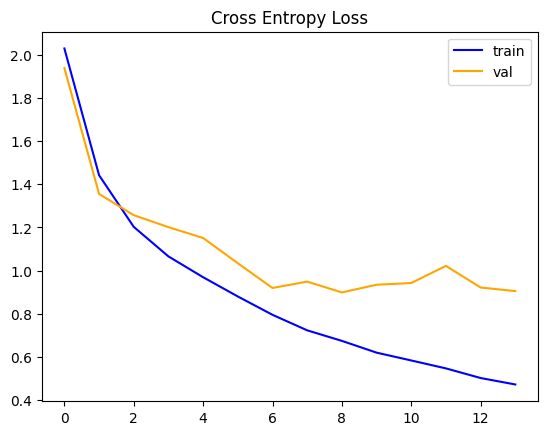

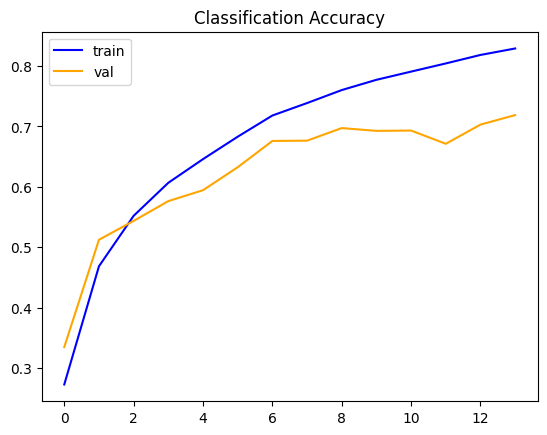

In [ ]:
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='val')
plt.legend()
plt.show()

plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='val')
plt.legend()
plt.show()

Overall, the training and validation sets loss and accuracy become closer together. Still there is a gap and fluctuation but it shows our latest model performs much better than the previous two models in terms of  accuracy .  We can see that the model is better in recognizing the complex patterns with reaching 0.89 in train set in epoc 12 compared with less than 85% in the previous model in epoc 14 and with validation set increased accuracy from 0.67 to 0.71 in epoc 12. Also we can see in the history that the last model become overfitted sooner  and stopped at epoch 14 in compare with the previous model that stopped at epoch 15.

In [ ]:
predictions = model_3_dropout_BNorm_2conv.predict(x_test)

313/313 [==============================] - 1s 3ms/step


0 airplane
1 automobile
2 bird
3 cat
4 deer
5 dog
6 frog
7 horse
8 ship
9 truck


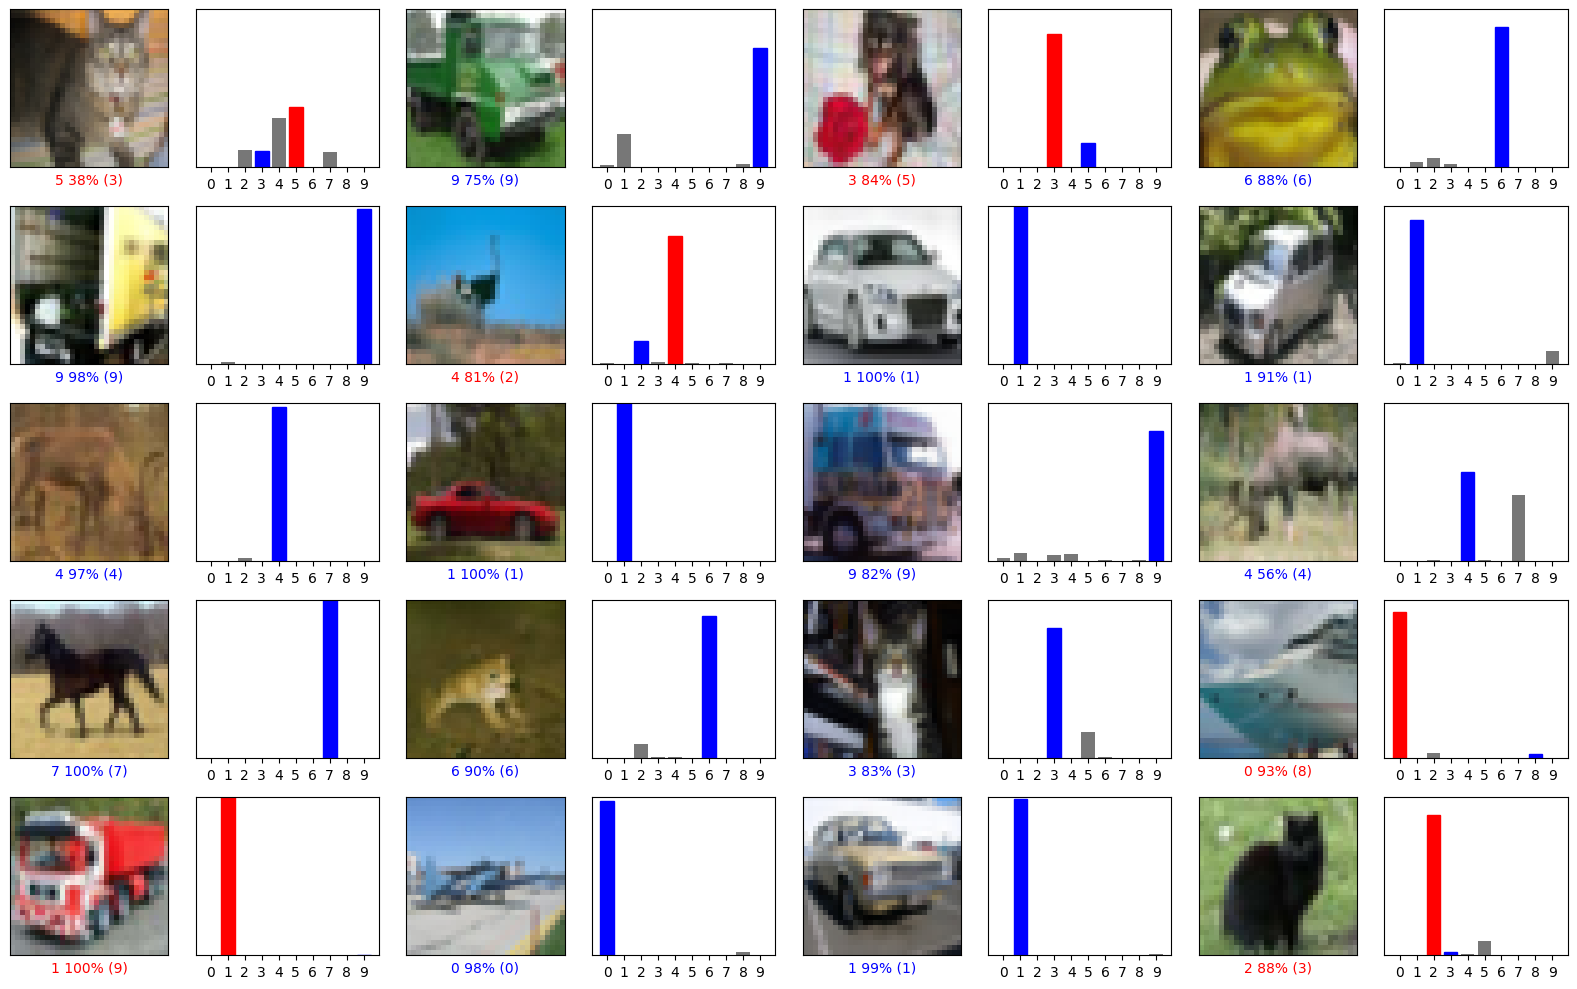

In [ ]:
i = 0
for l in cifar10_labels:
    print(i, l)
    i += 1

num_rows = 5
num_cols = 4
start = 650
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i+start, predictions[i+start], y_test, x_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i+start, predictions[i+start], y_test)
plt.tight_layout()
plt.show()

We can see in general the errors here are less than the previous one (6 vs 7). The first column was correct in the previous model in this model it has two errors while increases the confidence level of the other right guesses in the column.In the second column we can see that it correctly realized the frog with 90% confidence while in the previous model it recognizes with 89% as bird. It also increases the confidence level of the correct recognitions.The new model also could recognize correctly the deer in the fourth column as previously recognized as horse. We can see that the black cat and ship are still unrecognizable by the model (we should play with shades in data augmnetation model).

In [ ]:
comparison_dataframe.to_csv('/content/sample_data/comparison_dataframe.csv', index=False)

In [ ]:
comparison_dataframe= pd.read_csv('/content/sample_data/comparison_dataframe.csv')

In [ ]:
comparison_dataframe

,Model Name,Accuracy
0,Base Model,0.5962
1,Add Convolution and early stopper,0.6513
2,Add dropout and batch normalizer,0.6892
3,Added two convolution layers on top of dropout...,0.7170


Now I want to make my convolution layers deeper to detect more complicated patterns and their relationship with deeper understanding.

### Model *4*: deeper convolution filters

In [ ]:
K.clear_session()
model_4_dropout_BNorm_4conv_deep=0

In [ ]:
model_4_dropout_BNorm_4conv_deep = ks.Sequential()
model_4_dropout_BNorm_4conv_deep.add(ks.layers.Conv2D(64, (3, 3), strides=1, activation='relu',
                                     padding='same', input_shape=(32,32,3)))
model_4_dropout_BNorm_4conv_deep.add(ks.layers.BatchNormalization())
model_4_dropout_BNorm_4conv_deep.add(ks.layers.Conv2D(64, (3, 3), strides=1, activation='relu',
                                     padding='same'))
model_4_dropout_BNorm_4conv_deep.add(ks.layers.BatchNormalization())
model_4_dropout_BNorm_4conv_deep.add(ks.layers.Conv2D(64, (3, 3), strides=1, activation='relu',
                                     padding='same'))
model_4_dropout_BNorm_4conv_deep.add(ks.layers.BatchNormalization())
model_4_dropout_BNorm_4conv_deep.add(ks.layers.Conv2D(64, (3, 3), strides=1, activation='relu',
                                     padding='same'))
model_4_dropout_BNorm_4conv_deep.add(ks.layers.BatchNormalization())
model_4_dropout_BNorm_4conv_deep.add(ks.layers.MaxPooling2D((2, 2)))
model_4_dropout_BNorm_4conv_deep.add(ks.layers.Dropout(0.4))
model_4_dropout_BNorm_4conv_deep.add(ks.layers.Flatten())
model_4_dropout_BNorm_4conv_deep.add(ks.layers.Dense(32, activation='relu'))
model_4_dropout_BNorm_4conv_deep.add(ks.layers.Dense(10, activation='softmax'))

Let's describe the added sections in this model in compare to the previous model: I simply made the four convolution layers we had in the previous model deeper from 32 to 64 (2 were of size 32,3by3). So now all of the convolution layers are 64. Let's see the summary:

In [ ]:
model_4_dropout_BNorm_4conv_deep.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization (Batch  (None, 32, 32, 64)        256       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 64)        256       
 chNormalization)                                                
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_2 (Bat  (None, 32, 32, 64)        2

Let's compare this model with model 3:
Number of Convolutional Layers: The first model had four convolutional layers (two with 32 filters and two with 64 filters), while the second model has four convolutional layers with 64 filters each. The second model is deeper in terms of the number of convolutional layers.

Total Parameters: The first model had a total of 590,986 parameters, while the second model has 638,250 parameters. The increase in parameters in the second model is due to the deeper convolutional layers, which have more filters.

Trainable vs. Non-trainable Parameters: In both models, the majority of parameters are trainable. The second model has slightly more non-trainable parameters (512 vs. 384 in the first model), likely due to the increased number of batch normalization layers (from 128 in the first two layers in the first model to 256 in the second model)

Output Shape: Both models have the same output shape for the final convolutional layer and the subsequent layers.


In [ ]:
model_4_dropout_BNorm_4conv_deep.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# We validate the result
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))
print('Validation: X=%s, y=%s' % (x_val.shape, y_val.shape))

Train: X=(40000, 32, 32, 3), y=(40000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)
Validation: X=(10000, 32, 32, 3), y=(10000, 1)


In [ ]:
callback_loss = EarlyStopping(monitor='val_loss', patience=5)
callback_accuracy = EarlyStopping(monitor='val_accuracy', patience=5)

In [ ]:
t = time.perf_counter()

In [ ]:
history =model_4_dropout_BNorm_4conv_deep.fit(x_train, y_train, epochs=20,
                    use_multiprocessing=False, batch_size= 64,
                    validation_data=(x_val, y_val),
                     callbacks=[callback_accuracy, callback_loss])    # early stopper call back

Epoch 1/20
625/625 [==============================] - 19s 25ms/step - loss: 1.8501 - accuracy: 0.3288 - val_loss: 1.5516 - val_accuracy: 0.4206
Epoch 2/20
625/625 [==============================] - 15s 24ms/step - loss: 1.3348 - accuracy: 0.5053 - val_loss: 1.1986 - val_accuracy: 0.5682
Epoch 3/20
625/625 [==============================] - 15s 24ms/step - loss: 1.0688 - accuracy: 0.6131 - val_loss: 1.0514 - val_accuracy: 0.6158
Epoch 4/20
625/625 [==============================] - 15s 25ms/step - loss: 0.9434 - accuracy: 0.6573 - val_loss: 1.0113 - val_accuracy: 0.6434
Epoch 5/20
625/625 [==============================] - 15s 24ms/step - loss: 0.8606 - accuracy: 0.6903 - val_loss: 0.9118 - val_accuracy: 0.6719
Epoch 6/20
625/625 [==============================] - 15s 24ms/step - loss: 0.7837 - accuracy: 0.7161 - val_loss: 0.8804 - val_accuracy: 0.6951
Epoch 7/20
625/625 [==============================] - 15s 24ms/step - loss: 0.7237 - accuracy: 0.7414 - val_loss: 0.9157 - val_accuracy:

In [ ]:
elapsed_time = datetime.timedelta(seconds=(time.perf_counter() - t))

print('Training time:', elapsed_time)

Training time: 0:04:13.800539


In [ ]:
model_accuracies = {}
_, acc = model_4_dropout_BNorm_4conv_deep.evaluate(x_test, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))
model_accuracies['Deeper convolution'] = acc
accuracy_matrix = np.array(list(model_accuracies.values()))
print(accuracy_matrix)

> 72.700
[0.727]


In [ ]:
data = {
    'Model Name': [
        'Base Model',
        'Add Convolution and early stopper',
        'Add dropout and batch normalizer',
        'Added two convolution layers on top of dropout and normalizer',
        'Make all convolution layers 64',
    ],
    'Accuracy': [0.5962, 0.6513, 0.6892, 0.7170, 0.727]
}

comparison_dataframe = pd.DataFrame(data)
print(comparison_dataframe)

                                          Model Name  Accuracy
0                                         Base Model    0.5962
1                  Add Convolution and early stopper    0.6513
2                   Add dropout and batch normalizer    0.6892
3  Added two convolution layers on top of dropout...    0.7170
4                     Make all convolution layers 64    0.7270


We can see that the accuracy on test set increased as we make the convolution layers denser. Let's look at the loss and accuracy charts:

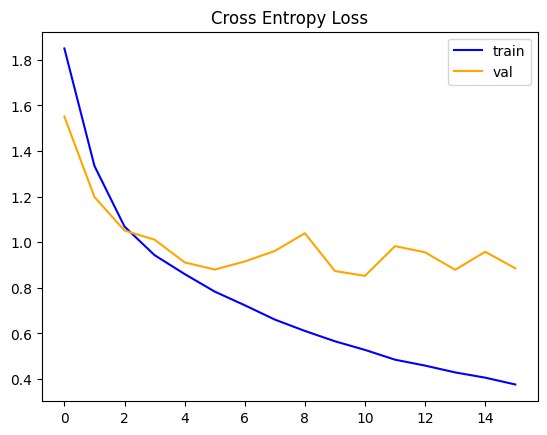

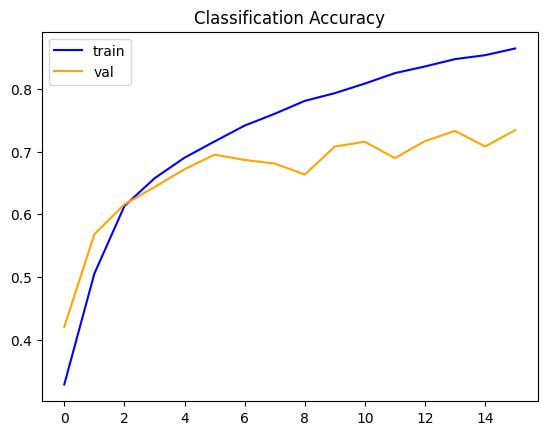

In [ ]:
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='val')
plt.legend()
plt.show()

plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='val')
plt.legend()
plt.show()

We can see the whole accuracy improves . It overfitts later than the previous model (epoch 16 in model 4 in compare to model 3) In the next model I am going to add more dropouts and a dense layer to make it perform better and become stable

In [ ]:
predictions =  model_4_dropout_BNorm_4conv_deep.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [ ]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label[0]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label[0]].set_color('blue')

0 airplane
1 automobile
2 bird
3 cat
4 deer
5 dog
6 frog
7 horse
8 ship
9 truck


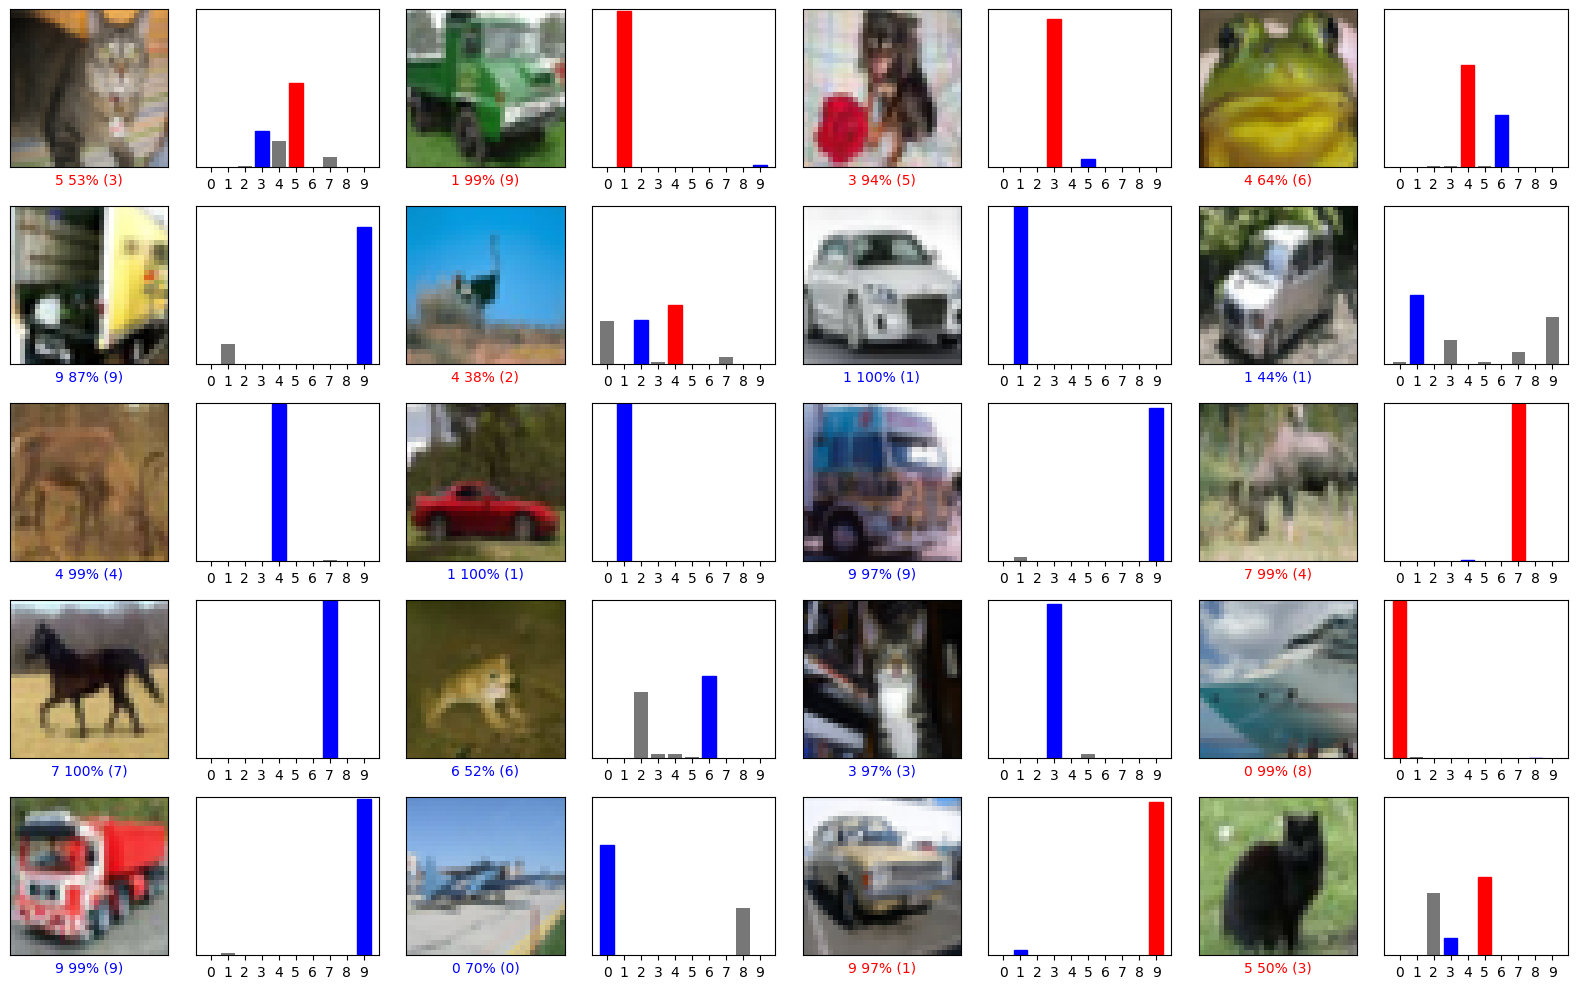

In [ ]:
i = 0
for l in cifar10_labels:
    print(i, l)
    i += 1

num_rows = 5
num_cols = 4
start = 650
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i+start, predictions[i+start], y_test, x_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i+start, predictions[i+start], y_test)
plt.tight_layout()
plt.show()

In general it seems Model 4,although with higher score in test set but in the first 20 test images it hasn't done better than the previous models. Let's add a dense layer with two drop out

### Model 5: Deeper Dense layer and additional dropouts

In [11]:
K.clear_session()
model_5_dropout_BNorm_4conv_deep_dense=0

In [12]:
model_5_dropout_BNorm_4conv_deep_dense = ks.Sequential()
model_5_dropout_BNorm_4conv_deep_dense.add(ks.layers.Conv2D(64, (3, 3), strides=1, activation='relu',
                                     padding='same', input_shape=(32,32,3)))
model_5_dropout_BNorm_4conv_deep_dense.add(ks.layers.BatchNormalization())
model_5_dropout_BNorm_4conv_deep_dense.add(ks.layers.Conv2D(64, (3, 3), strides=1, activation='relu',
                                     padding='same'))
model_5_dropout_BNorm_4conv_deep_dense.add(ks.layers.BatchNormalization())
model_5_dropout_BNorm_4conv_deep_dense.add(ks.layers.MaxPooling2D((2, 2)))
model_5_dropout_BNorm_4conv_deep_dense.add(ks.layers.Dropout(0.3))

model_5_dropout_BNorm_4conv_deep_dense.add(ks.layers.Conv2D(64, (3, 3), activation='relu'))
model_5_dropout_BNorm_4conv_deep_dense.add(ks.layers.BatchNormalization())
model_5_dropout_BNorm_4conv_deep_dense.add(ks.layers.Conv2D(64, (3, 3), activation='relu'))
model_5_dropout_BNorm_4conv_deep_dense.add(ks.layers.BatchNormalization())
model_5_dropout_BNorm_4conv_deep_dense.add(ks.layers.MaxPooling2D((2, 2)))
model_5_dropout_BNorm_4conv_deep_dense.add(ks.layers.Dropout(0.3))

model_5_dropout_BNorm_4conv_deep_dense.add(ks.layers.Flatten())
model_5_dropout_BNorm_4conv_deep_dense.add(ks.layers.Dense(128, activation='relu'))
model_5_dropout_BNorm_4conv_deep_dense.add(ks.layers.BatchNormalization())
model_5_dropout_BNorm_4conv_deep_dense.add(ks.layers.Dropout(0.5))
model_5_dropout_BNorm_4conv_deep_dense.add(ks.layers.Dense(10, activation='softmax'))

In [13]:
model_5_dropout_BNorm_4conv_deep_dense.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization (Batch  (None, 32, 32, 64)        256       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 64)        0         
 D)                                                              
                                                        

I changed the architecture so maybe we can get better result:

**Model 4**:

Total params: 638,250
Trainable params: 637,738
Non-trainable params: 512
Architecture:
Four convolutional layers with 64 filters each, followed by batch normalization and max pooling.
Dropout layers after each max pooling layer.
Two dense layers with 32 and 10 units respectively.

**Model 5**:

Total params: 410,442
Trainable params: 409,674
Non-trainable params: 768
Architecture:
Two convolutional layers with 64 filters each, followed by batch normalization and max pooling.
Dropout layer after the second max pooling layer.
Two additional convolutional layers with 64 filters each, followed by batch normalization and max pooling.
Dropout layer after the fourth convolutional layer.
Two dense layers with 128 and 10 units respectively.
Key Differences:

Both models have the same number of convolutional layers, but the second model has fewer parameters due to differences in the dense layers and the use of batch normalization and dropout.

In [14]:
model_5_dropout_BNorm_4conv_deep_dense.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
# We validate the result
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))
print('Validation: X=%s, y=%s' % (x_val.shape, y_val.shape))

Train: X=(40000, 32, 32, 3), y=(40000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)
Validation: X=(10000, 32, 32, 3), y=(10000, 1)


In [16]:
# Callbacks
callback_loss = EarlyStopping(monitor='val_loss', patience=5)
callback_accuracy = EarlyStopping(monitor='val_accuracy', patience=5)

In [17]:
t = time.perf_counter()

In [18]:
history =model_5_dropout_BNorm_4conv_deep_dense.fit(x_train, y_train, epochs=20,
                    use_multiprocessing=False, batch_size= 64,
                    validation_data=(x_val, y_val),
                     callbacks=[callback_accuracy, callback_loss])

Epoch 1/20
625/625 [==============================] - 18s 16ms/step - loss: 1.6904 - accuracy: 0.4252 - val_loss: 1.2162 - val_accuracy: 0.5726
Epoch 2/20
625/625 [==============================] - 9s 14ms/step - loss: 1.1437 - accuracy: 0.5969 - val_loss: 1.0550 - val_accuracy: 0.6208
Epoch 3/20
625/625 [==============================] - 9s 14ms/step - loss: 0.9644 - accuracy: 0.6618 - val_loss: 0.8849 - val_accuracy: 0.6842
Epoch 4/20
625/625 [==============================] - 9s 14ms/step - loss: 0.8633 - accuracy: 0.6977 - val_loss: 0.8850 - val_accuracy: 0.6847
Epoch 5/20
625/625 [==============================] - 9s 14ms/step - loss: 0.7932 - accuracy: 0.7223 - val_loss: 1.0320 - val_accuracy: 0.6617
Epoch 6/20
625/625 [==============================] - 9s 14ms/step - loss: 0.7423 - accuracy: 0.7410 - val_loss: 0.7485 - val_accuracy: 0.7358
Epoch 7/20
625/625 [==============================] - 9s 14ms/step - loss: 0.6973 - accuracy: 0.7565 - val_loss: 1.0571 - val_accuracy: 0.667

In [19]:
elapsed_time = datetime.timedelta(seconds=(time.perf_counter() - t))

print('Training time:', elapsed_time)

Training time: 0:04:23.912391


We can see the accuracy on validation set is 80.67% let's see how it does in the test set

In [20]:
model_accuracies = {}

In [21]:
_, acc = model_5_dropout_BNorm_4conv_deep_dense.evaluate(x_test, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))
model_accuracies['base_model'] = acc
accuracy_matrix = np.array(list(model_accuracies.values()))
print(accuracy_matrix)


> 79.900
[0.79900002]


In [22]:
data = {
    'Model Name': [
        'Base Model',
        'Add Convolution and early stopper',
        'Add dropout and batch normalizer',
        'Added two convolution layers on top of dropout and normalizer',
        'Make all convolution layers 64',
        'Dense layer more dropouts and change the place of dropouts so we have less parameters'
    ],
    'Accuracy': [0.5962, 0.6513, 0.6892, 0.7170, 0.727,0.7990]
}

comparison_dataframe = pd.DataFrame(data)
print(comparison_dataframe)

                                          Model Name  Accuracy
0                                         Base Model    0.5962
1                  Add Convolution and early stopper    0.6513
2                   Add dropout and batch normalizer    0.6892
3  Added two convolution layers on top of dropout...    0.7170
4                     Make all convolution layers 64    0.7270
5  Dense layer more dropouts and change the place...    0.7990


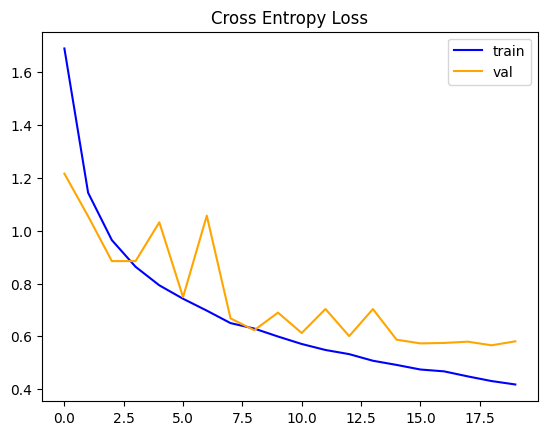

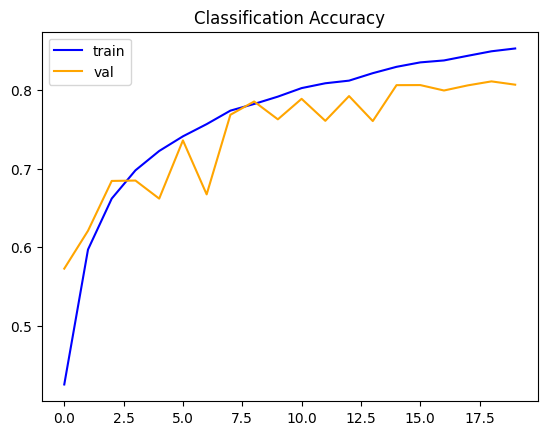

In [23]:
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='val')
plt.legend()
plt.show()

plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='val')
plt.legend()
plt.show()

overall the training performance and the validation performance are closer althought still have fluctuations mostly because of the more dropouts. The performance is better, it stays for all the 20 epochs which means early stopper didn't catch any extreme overfitting and it wasn't overfitted. Still need to make it better. The performance on test increases as we added the dense layer of 128 and can catch more complex patterns sooner.

In [24]:
predictions = model_5_dropout_BNorm_4conv_deep_dense.predict(x_test)

313/313 [==============================] - 1s 2ms/step


0 airplane
1 automobile
2 bird
3 cat
4 deer
5 dog
6 frog
7 horse
8 ship
9 truck


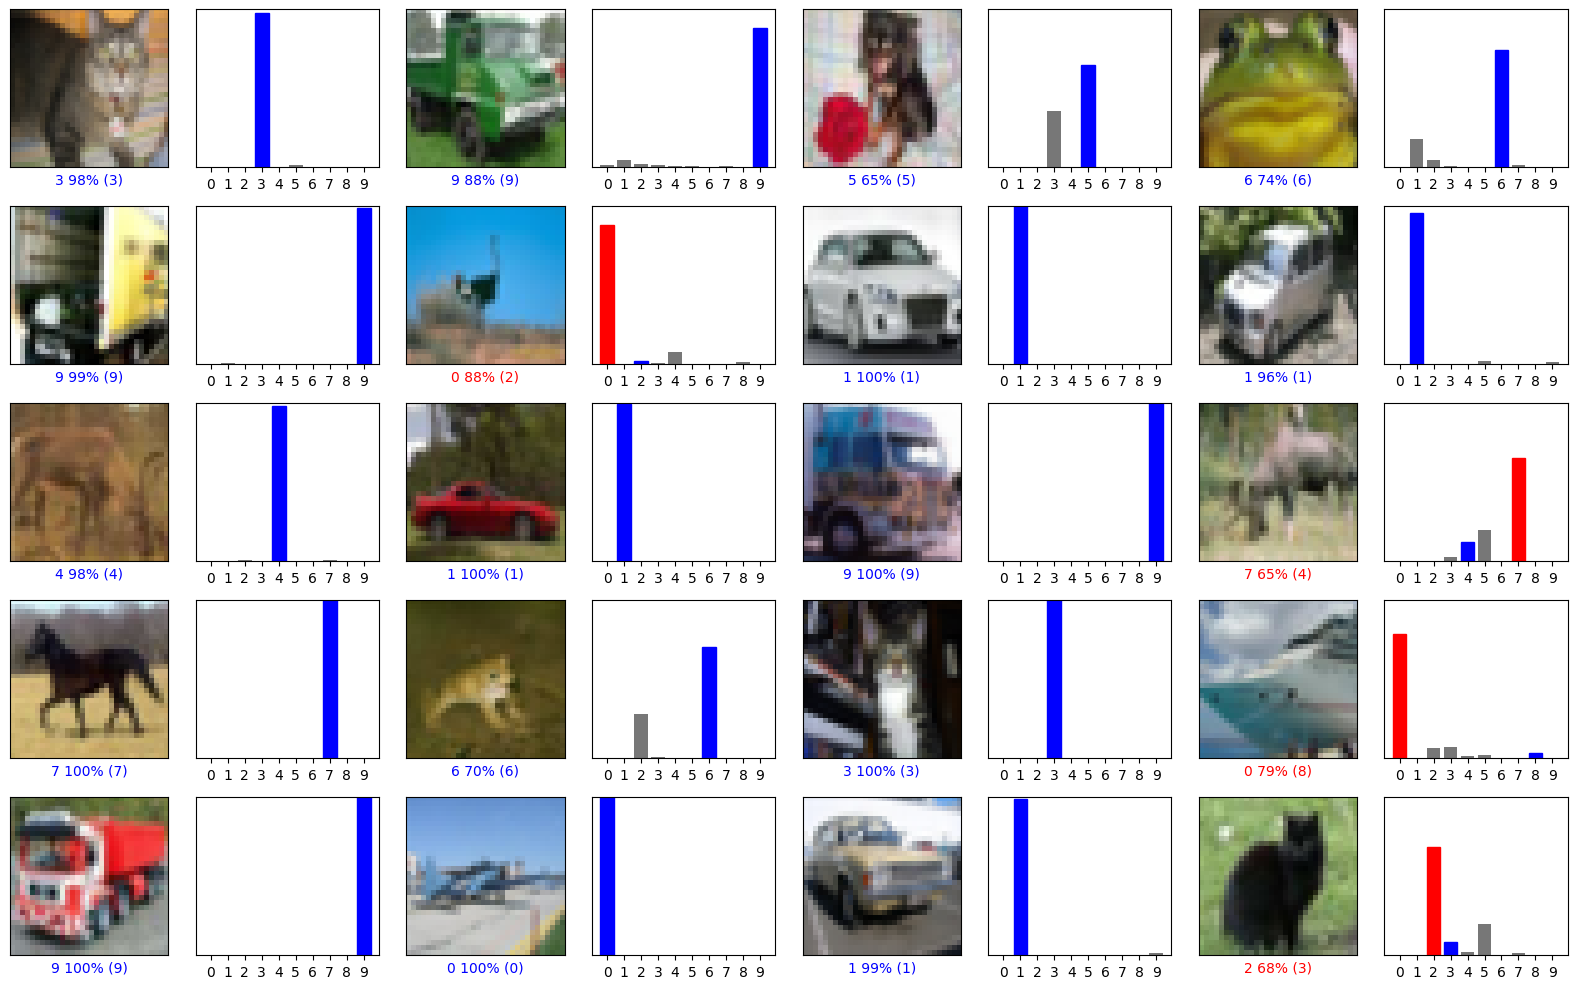

In [25]:
i = 0
for l in cifar10_labels:
    print(i, l)
    i += 1

num_rows = 5
num_cols = 4
start = 650
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i+start, predictions[i+start], y_test, x_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i+start, predictions[i+start], y_test)
plt.tight_layout()
plt.show()

We can see it has 4 error in the first 20 test images although the model may guess better on the rest of the images, here with only 4 errors it does better than the previous models. Let's add two more convolution layers.

### Model 6: More Complex adding two conv 128

In [26]:
K.clear_session()
model_6_dropout_complex_2denseconv128=0

In [27]:
model_6_dropout_complex_2denseconv128 = ks.Sequential()
model_6_dropout_complex_2denseconv128.add(ks.layers.Conv2D(64, (3, 3), strides=1, activation='relu',
                                     padding='same', input_shape=(32,32,3)))
model_6_dropout_complex_2denseconv128.add(ks.layers.BatchNormalization())
model_6_dropout_complex_2denseconv128.add(ks.layers.Conv2D(64, (3, 3), strides=1, activation='relu',
                                     padding='same'))
model_6_dropout_complex_2denseconv128.add(ks.layers.BatchNormalization())
model_6_dropout_complex_2denseconv128.add(ks.layers.MaxPooling2D((2, 2)))
model_6_dropout_complex_2denseconv128.add(ks.layers.Dropout(0.3))

model_6_dropout_complex_2denseconv128.add(ks.layers.Conv2D(64, (3, 3), activation='relu'))
model_6_dropout_complex_2denseconv128.add(ks.layers.BatchNormalization())
model_6_dropout_complex_2denseconv128.add(ks.layers.Conv2D(64, (3, 3), activation='relu'))
model_6_dropout_complex_2denseconv128.add(ks.layers.BatchNormalization())
model_6_dropout_complex_2denseconv128.add(ks.layers.MaxPooling2D((2, 2)))
model_6_dropout_complex_2denseconv128.add(ks.layers.Dropout(0.3))


model_6_dropout_complex_2denseconv128.add(ks.layers.Conv2D(128, (3, 3), activation='relu'))
model_6_dropout_complex_2denseconv128.add(ks.layers.BatchNormalization())
model_6_dropout_complex_2denseconv128.add(ks.layers.Conv2D(128, (3, 3), activation='relu'))
model_6_dropout_complex_2denseconv128.add(ks.layers.BatchNormalization())
model_6_dropout_complex_2denseconv128.add(ks.layers.MaxPooling2D((2, 2)))
model_6_dropout_complex_2denseconv128.add(ks.layers.Dropout(0.4))


model_6_dropout_complex_2denseconv128.add(ks.layers.Flatten())
model_6_dropout_complex_2denseconv128.add(ks.layers.Dense(128, activation='relu'))
model_6_dropout_complex_2denseconv128.add(ks.layers.BatchNormalization())
model_6_dropout_complex_2denseconv128.add(ks.layers.Dropout(0.5))
model_6_dropout_complex_2denseconv128.add(ks.layers.Dense(10, activation='softmax'))

In [28]:
model_6_dropout_complex_2denseconv128.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization (Batch  (None, 32, 32, 64)        256       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 64)        0         
 D)                                                              
                                                        

**Model 6**
Total params: 354,378
Trainable params: 353,098
Non-trainable params: 1,280
Architecture:
Same as model 5 up to the last max pooling layer.
Additional two convolutional layers with 128 filters each, followed by batch normalization and max pooling.
Dropout layer after the last max pooling layer.
Flatten layer.
Dense layer with 128 units, followed by batch normalization and dropout.
Output layer with 10 units and softmax activation.


Model 6 has a slightly smaller total number of parameters compared to the model 5.
and has a more complex architecture with additional convolutional and dense layers, potentially allowing it to learn more intricate features. However model 6 has more non-trainable parameters, likely due to the additional layers requiring more normalization parameters.
In summary, model 6 is deeper and more complex, which may allow it to capture more complex patterns in the data. However, the previous model is simpler and may train faster, but may have a slightly lower capacity to learn intricate features.

In [29]:
model_6_dropout_complex_2denseconv128.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'], )

In [30]:
# We validate the result
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))
print('Validation: X=%s, y=%s' % (x_val.shape, y_val.shape))

Train: X=(40000, 32, 32, 3), y=(40000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)
Validation: X=(10000, 32, 32, 3), y=(10000, 1)


In [31]:
callback_loss = EarlyStopping(monitor='val_loss', patience=5)
callback_accuracy = EarlyStopping(monitor='val_accuracy', patience=5)

### Train the model

In [32]:
t = time.perf_counter()

In [33]:
history = model_6_dropout_complex_2denseconv128.fit(x_train, y_train, epochs=20,
                    use_multiprocessing=False, batch_size= 64,
                    validation_data=(x_val, y_val),
                     callbacks=[callback_accuracy, callback_loss])    # early stopper call b

Epoch 1/20
625/625 [==============================] - 16s 17ms/step - loss: 1.9023 - accuracy: 0.3509 - val_loss: 1.6104 - val_accuracy: 0.4195
Epoch 2/20
625/625 [==============================] - 10s 15ms/step - loss: 1.2730 - accuracy: 0.5440 - val_loss: 1.1324 - val_accuracy: 0.5949
Epoch 3/20
625/625 [==============================] - 9s 15ms/step - loss: 1.0576 - accuracy: 0.6281 - val_loss: 0.9384 - val_accuracy: 0.6641
Epoch 4/20
625/625 [==============================] - 10s 15ms/step - loss: 0.9324 - accuracy: 0.6742 - val_loss: 1.1350 - val_accuracy: 0.6202
Epoch 5/20
625/625 [==============================] - 9s 15ms/step - loss: 0.8467 - accuracy: 0.7083 - val_loss: 0.8490 - val_accuracy: 0.7052
Epoch 6/20
625/625 [==============================] - 9s 15ms/step - loss: 0.7789 - accuracy: 0.7337 - val_loss: 0.6767 - val_accuracy: 0.7642
Epoch 7/20
625/625 [==============================] - 9s 15ms/step - loss: 0.7277 - accuracy: 0.7515 - val_loss: 0.8076 - val_accuracy: 0.7

In [34]:
elapsed_time = datetime.timedelta(seconds=(time.perf_counter() - t))

print('Training time:', elapsed_time)

Training time: 0:03:54.031506


In [35]:
model_accuracies = {}
_, acc =model_6_dropout_complex_2denseconv128.evaluate(x_test, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))
model_accuracies['Add One layer convolution + Early Stopper'] = acc
accuracy_matrix = np.array(list(model_accuracies.values()))
print(accuracy_matrix)


> 81.590
[0.81590003]


In [36]:
data = {
    'Model Name': [
        'Base Model',
        'Add Convolution and early stopper',
        'Add dropout and batch normalizer',
        'Added two convolution layers on top of dropout and normalizer',
        'Make all convolution layers 64',
        'Dense layer more dropouts and change the place of dropouts so we have less parameters',
        'Add two additional convolution layer of 128 with dropout of 0.4',
    ],
    'Accuracy': [0.5962, 0.6513, 0.6892, 0.7170, 0.727,0.79810,0.8159]
}

comparison_dataframe = pd.DataFrame(data)
print(comparison_dataframe)

                                          Model Name  Accuracy
0                                         Base Model    0.5962
1                  Add Convolution and early stopper    0.6513
2                   Add dropout and batch normalizer    0.6892
3  Added two convolution layers on top of dropout...    0.7170
4                     Make all convolution layers 64    0.7270
5  Dense layer more dropouts and change the place...    0.7981
6  Add two additional convolution layer of 128 wi...    0.8159


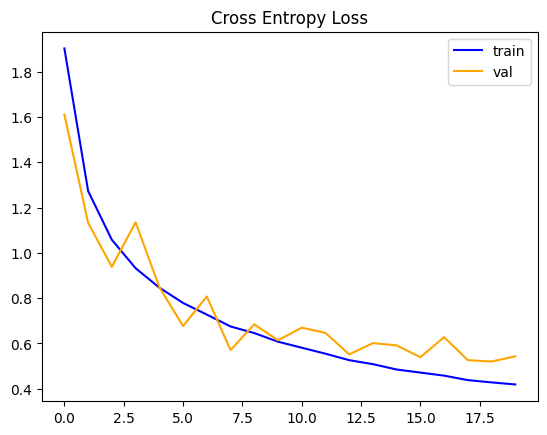

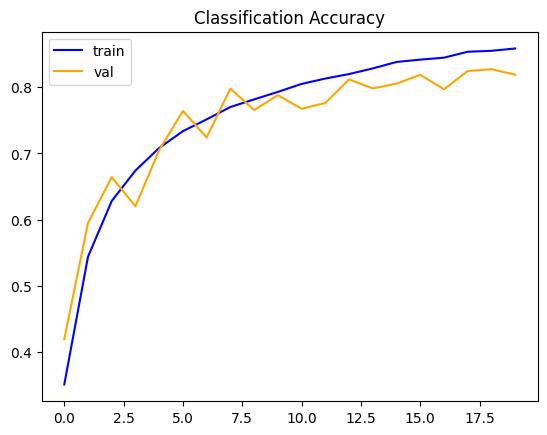

In [37]:
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='val')
plt.legend()
plt.show()

plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='val')
plt.legend()
plt.show()

we can see that the train and validation plots become closer together and we can see for the first 8 epochs the model did well on validation set in compare to the train data at many points and as it trains it has its ups and downs because of the dropouts but it learns complex patterns and didn't overfit. It performs better than model 5.

In [38]:
predictions = model_6_dropout_complex_2denseconv128.predict(x_test)

313/313 [==============================] - 1s 3ms/step


0 airplane
1 automobile
2 bird
3 cat
4 deer
5 dog
6 frog
7 horse
8 ship
9 truck


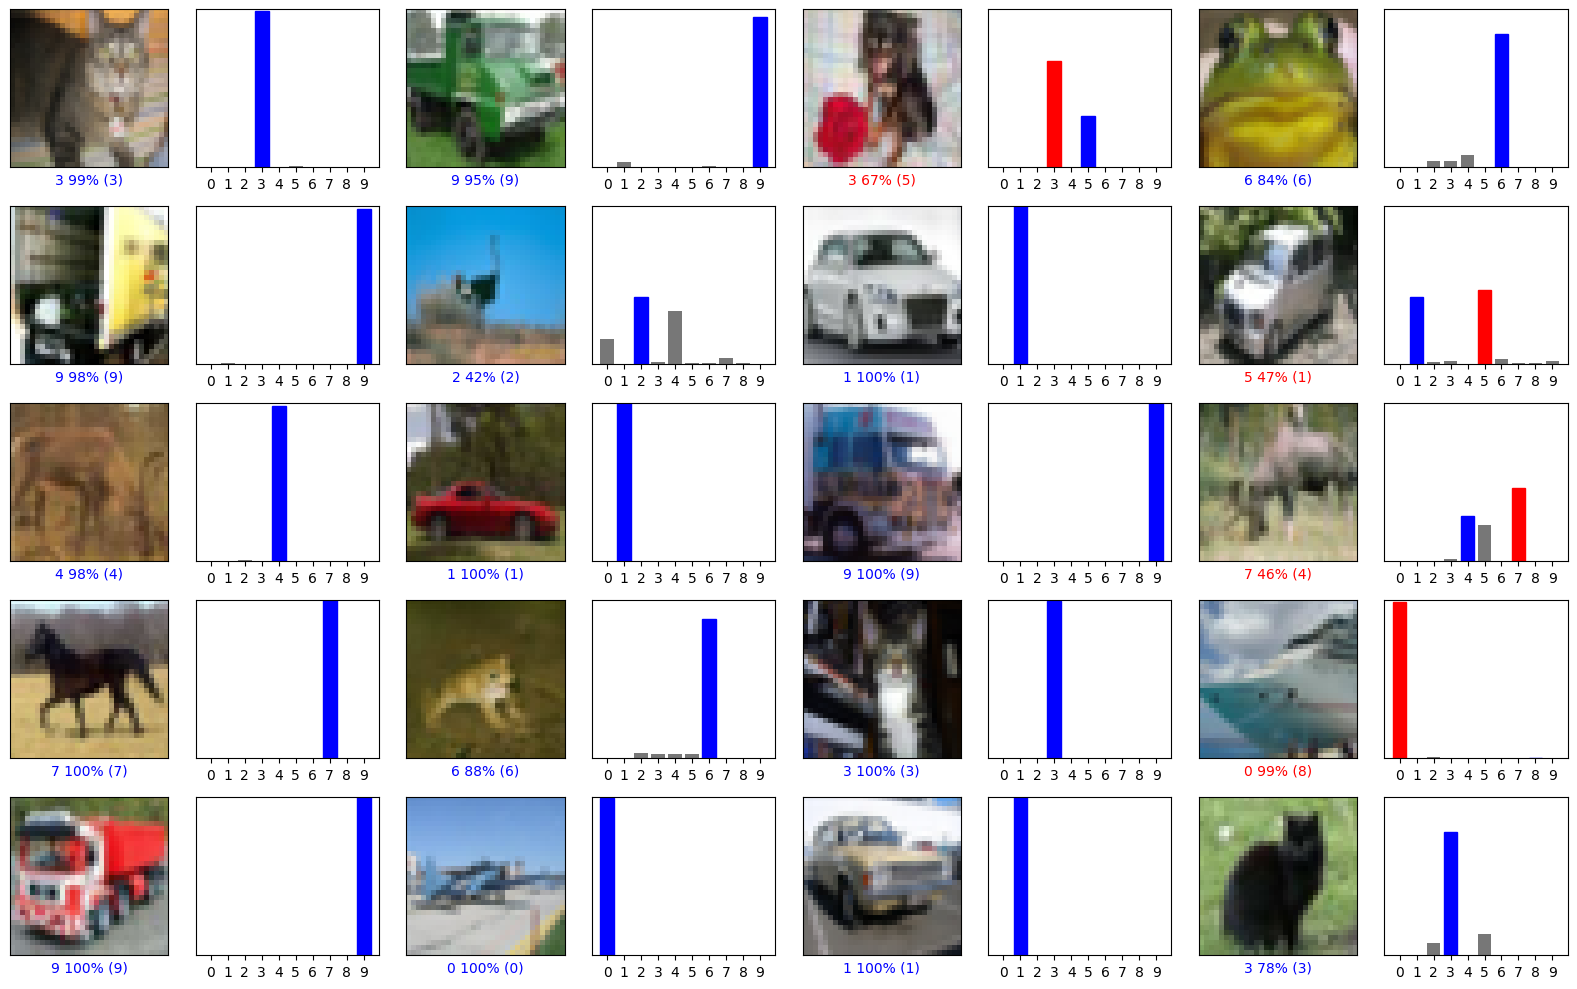

In [39]:
i = 0
for l in cifar10_labels:
    print(i, l)
    i += 1

num_rows = 5
num_cols = 4
start = 650
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i+start, predictions[i+start], y_test, x_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i+start, predictions[i+start], y_test)
plt.tight_layout()
plt.show()

In the first 20 images it performs like  model 5 with four errors (errors with less confidence error than the previous model): one same as the previous model (the ship) which we should train by augmentation.

### Play With learning rate
**Model 6.1: Learning scheduler**

We saw in the moels above there are fluctuations in the loss and accuracy plots as we made the network complicated. Now let's try with learning scheduler

In [40]:
K.clear_session()
model_6_dropout_complex_2denseconv128=0

In [41]:
model_6_dropout_complex_2denseconv128 = ks.Sequential()
model_6_dropout_complex_2denseconv128.add(ks.layers.Conv2D(64, (3, 3), strides=1, activation='relu',
                                     padding='same', input_shape=(32,32,3)))
model_6_dropout_complex_2denseconv128.add(ks.layers.BatchNormalization())
model_6_dropout_complex_2denseconv128.add(ks.layers.Conv2D(64, (3, 3), strides=1, activation='relu',
                                     padding='same'))
model_6_dropout_complex_2denseconv128.add(ks.layers.BatchNormalization())
model_6_dropout_complex_2denseconv128.add(ks.layers.MaxPooling2D((2, 2)))
model_6_dropout_complex_2denseconv128.add(ks.layers.Dropout(0.3))

model_6_dropout_complex_2denseconv128.add(ks.layers.Conv2D(64, (3, 3), activation='relu'))
model_6_dropout_complex_2denseconv128.add(ks.layers.BatchNormalization())
model_6_dropout_complex_2denseconv128.add(ks.layers.Conv2D(64, (3, 3), activation='relu'))
model_6_dropout_complex_2denseconv128.add(ks.layers.BatchNormalization())
model_6_dropout_complex_2denseconv128.add(ks.layers.MaxPooling2D((2, 2)))
model_6_dropout_complex_2denseconv128.add(ks.layers.Dropout(0.3))


model_6_dropout_complex_2denseconv128.add(ks.layers.Conv2D(128, (3, 3), activation='relu'))
model_6_dropout_complex_2denseconv128.add(ks.layers.BatchNormalization())
model_6_dropout_complex_2denseconv128.add(ks.layers.Conv2D(128, (3, 3), activation='relu'))
model_6_dropout_complex_2denseconv128.add(ks.layers.BatchNormalization())
model_6_dropout_complex_2denseconv128.add(ks.layers.MaxPooling2D((2, 2)))
model_6_dropout_complex_2denseconv128.add(ks.layers.Dropout(0.4))


model_6_dropout_complex_2denseconv128.add(ks.layers.Flatten())
model_6_dropout_complex_2denseconv128.add(ks.layers.Dense(128, activation='relu'))
model_6_dropout_complex_2denseconv128.add(ks.layers.BatchNormalization())
model_6_dropout_complex_2denseconv128.add(ks.layers.Dropout(0.5))
model_6_dropout_complex_2denseconv128.add(ks.layers.Dense(10, activation='softmax'))

In [42]:
model_6_dropout_complex_2denseconv128.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'], )

In [43]:
x_train[0].shape

(32, 32, 3)

In [44]:
# We validate the result
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))
print('Validation: X=%s, y=%s' % (x_val.shape, y_val.shape))

Train: X=(40000, 32, 32, 3), y=(40000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)
Validation: X=(10000, 32, 32, 3), y=(10000, 1)


In [45]:
# Callbacks
callback_loss = EarlyStopping(monitor='val_loss', patience=5)
callback_accuracy = EarlyStopping(monitor='val_accuracy', patience=5)

I define the leanring scheduler function here:

In [46]:
def lr_schedule(epoch, lr):
    if epoch < 10:
        return lr
    elif epoch < 20:
        return lr * 0.1
    else:
        return lr * 0.01

lr_scheduler = ks.callbacks.LearningRateScheduler(lr_schedule)

In [47]:
t = time.perf_counter()

In [48]:
history = model_6_dropout_complex_2denseconv128.fit(x_train, y_train, epochs=20,
                    use_multiprocessing=False, batch_size= 64,
                    validation_data=(x_val, y_val),
                     callbacks=[lr_scheduler, callback_accuracy, callback_loss])    # early stopper call back


Epoch 1/20
625/625 [==============================] - 15s 17ms/step - loss: 1.8832 - accuracy: 0.3574 - val_loss: 1.4934 - val_accuracy: 0.4604 - lr: 0.0010
Epoch 2/20
625/625 [==============================] - 10s 15ms/step - loss: 1.2797 - accuracy: 0.5405 - val_loss: 1.4419 - val_accuracy: 0.5127 - lr: 0.0010
Epoch 3/20
625/625 [==============================] - 10s 17ms/step - loss: 1.0704 - accuracy: 0.6236 - val_loss: 1.2413 - val_accuracy: 0.5585 - lr: 0.0010
Epoch 4/20
625/625 [==============================] - 10s 16ms/step - loss: 0.9359 - accuracy: 0.6756 - val_loss: 0.9212 - val_accuracy: 0.6750 - lr: 0.0010
Epoch 5/20
625/625 [==============================] - 10s 16ms/step - loss: 0.8445 - accuracy: 0.7090 - val_loss: 0.8475 - val_accuracy: 0.6991 - lr: 0.0010
Epoch 6/20
625/625 [==============================] - 10s 16ms/step - loss: 0.7903 - accuracy: 0.7293 - val_loss: 0.7391 - val_accuracy: 0.7395 - lr: 0.0010
Epoch 7/20
625/625 [==============================] - 9s 1

In [49]:
elapsed_time = datetime.timedelta(seconds=(time.perf_counter() - t))

print('Training time:', elapsed_time)

Training time: 0:03:47.756620


### 6. We evaluate the results
let's see how the model perform on test set and see the pltos for accuracy and loss of the validation and training set and see how they changes.



In [50]:
model_accuracies = {}

In [51]:

_, acc =model_6_dropout_complex_2denseconv128.evaluate(x_test, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))
model_accuracies['Add One layer convolution + Early Stopper'] = acc
accuracy_matrix = np.array(list(model_accuracies.values()))
print(accuracy_matrix)


> 82.280
[0.82279998]


In [65]:
data = {
    'Model Name': [
        'Base Model',
        'Add Convolution and early stopper',
        'Add dropout and batch normalizer',
        'Added two convolution layers on top of dropout and normalizer',
        'Make all convolution layers 64',
        'Dense layer more dropouts and change the place of dropouts so we have less parameters',
        'Add two additional convolution layer of 128 with dropout of 0.4',
        'Add learning scheduler'
    ],
    'Accuracy': [0.5962, 0.6513, 0.6892, 0.7170, 0.727,0.7990,0.8159,0.8228]
}

comparison_dataframe = pd.DataFrame(data)
print(comparison_dataframe)

                                          Model Name  Accuracy
0                                         Base Model    0.5962
1                  Add Convolution and early stopper    0.6513
2                   Add dropout and batch normalizer    0.6892
3  Added two convolution layers on top of dropout...    0.7170
4                     Make all convolution layers 64    0.7270
5  Dense layer more dropouts and change the place...    0.7990
6  Add two additional convolution layer of 128 wi...    0.8159
7                             Add learning scheduler    0.8228


We saw it increases from 81.25% in the previous model to 82.28% in this model with reducing learning rate. Let's see how stable are the plots

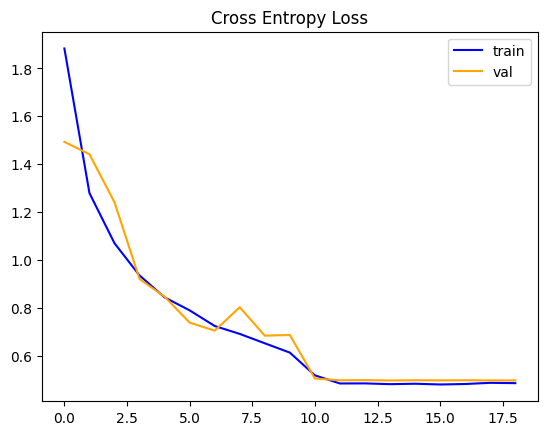

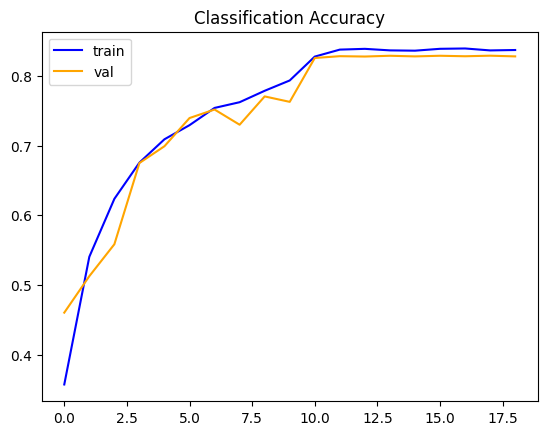

In [53]:
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='val')
plt.legend()
plt.show()

plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='val')
plt.legend()
plt.show()

This model is generally a good model as it becomes stable at the end with all the fluctuations at the beginning. The best model so far. I want to make another last model by making the first two convolution layers size reduce to 32

In [54]:
predictions = model_6_dropout_complex_2denseconv128.predict(x_test)

313/313 [==============================] - 1s 3ms/step


0 airplane
1 automobile
2 bird
3 cat
4 deer
5 dog
6 frog
7 horse
8 ship
9 truck


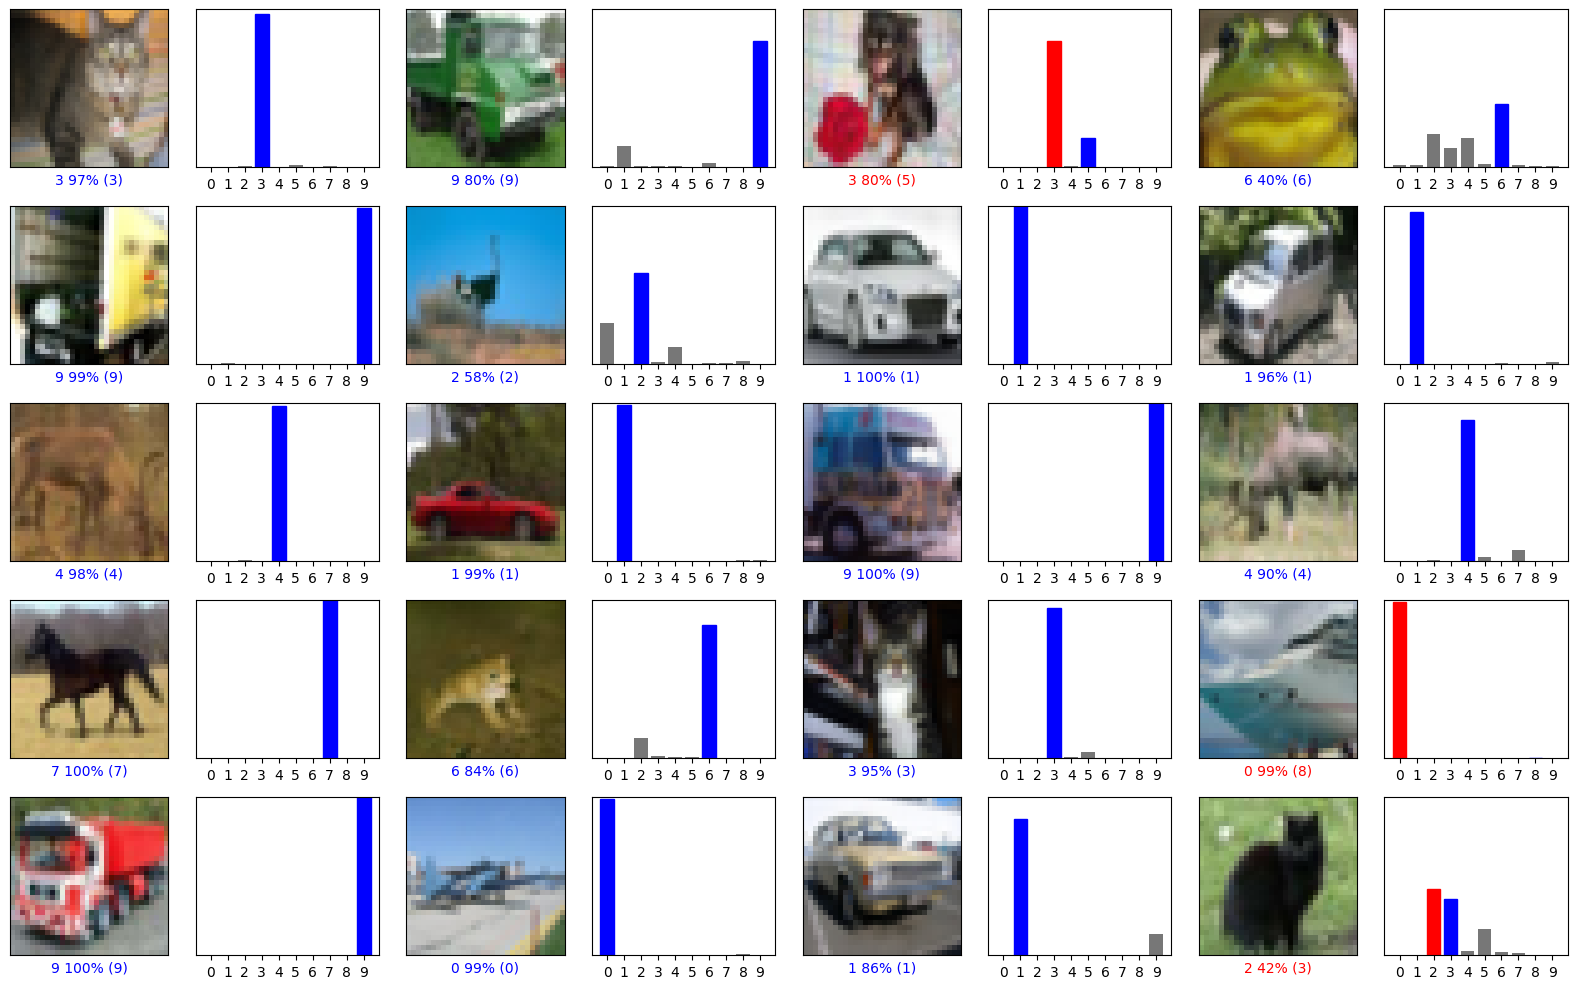

In [55]:
i = 0
for l in cifar10_labels:
    print(i, l)
    i += 1

num_rows = 5
num_cols = 4
start = 650
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i+start, predictions[i+start], y_test, x_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i+start, predictions[i+start], y_test)
plt.tight_layout()
plt.show()

We can see it has only 3 errors for the first 9 images in the test set which means the performance is becoming better.

**Model 7: Make the first two convolutions 32 with learning scheduler**

In [56]:
K.clear_session()
model_7_dropout_complex_2denseconv128_2convto32=0

In [57]:
model_7_dropout_complex_2denseconv128_2convto32 = ks.Sequential()
model_7_dropout_complex_2denseconv128_2convto32.add(ks.layers.Conv2D(32, (3, 3), strides=1, activation='relu',
                                     padding='same', input_shape=(32,32,3)))
model_7_dropout_complex_2denseconv128_2convto32.add(ks.layers.BatchNormalization())
model_7_dropout_complex_2denseconv128_2convto32.add(ks.layers.Conv2D(32, (3, 3), strides=1, activation='relu',
                                     padding='same'))
model_7_dropout_complex_2denseconv128_2convto32.add(ks.layers.BatchNormalization())
model_7_dropout_complex_2denseconv128_2convto32.add(ks.layers.MaxPooling2D((2, 2)))
model_7_dropout_complex_2denseconv128_2convto32.add(ks.layers.Dropout(0.2))

model_7_dropout_complex_2denseconv128_2convto32.add(ks.layers.Conv2D(64, (3, 3), activation='relu'))
model_7_dropout_complex_2denseconv128_2convto32.add(ks.layers.BatchNormalization())
model_7_dropout_complex_2denseconv128_2convto32.add(ks.layers.Conv2D(64, (3, 3), activation='relu'))
model_7_dropout_complex_2denseconv128_2convto32.add(ks.layers.BatchNormalization())
model_7_dropout_complex_2denseconv128_2convto32.add(ks.layers.MaxPooling2D((2, 2)))
model_7_dropout_complex_2denseconv128_2convto32.add(ks.layers.Dropout(0.3))


model_7_dropout_complex_2denseconv128_2convto32.add(ks.layers.Conv2D(128, (3, 3), activation='relu'))
model_7_dropout_complex_2denseconv128_2convto32.add(ks.layers.BatchNormalization())
model_7_dropout_complex_2denseconv128_2convto32.add(ks.layers.Conv2D(128, (3, 3), activation='relu'))
model_7_dropout_complex_2denseconv128_2convto32.add(ks.layers.BatchNormalization())
model_7_dropout_complex_2denseconv128_2convto32.add(ks.layers.MaxPooling2D((2, 2)))
model_7_dropout_complex_2denseconv128_2convto32.add(ks.layers.Dropout(0.4))


model_7_dropout_complex_2denseconv128_2convto32.add(ks.layers.Flatten())
model_7_dropout_complex_2denseconv128_2convto32.add(ks.layers.Dense(128, activation='relu'))
model_7_dropout_complex_2denseconv128_2convto32.add(ks.layers.BatchNormalization())
model_7_dropout_complex_2denseconv128_2convto32.add(ks.layers.Dropout(0.5))
model_7_dropout_complex_2denseconv128_2convto32.add(ks.layers.Dense(10, activation='softmax'))

In [58]:
model_7_dropout_complex_2denseconv128_2convto32.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                        

The layers are the same as before just because we make the first convolution layer 32 it reduces in total, both trainable and non-trainable parameters

In [59]:
model_7_dropout_complex_2denseconv128_2convto32.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'], )

In [60]:
# We validate the result
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))
print('Validation: X=%s, y=%s' % (x_val.shape, y_val.shape))

Train: X=(40000, 32, 32, 3), y=(40000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)
Validation: X=(10000, 32, 32, 3), y=(10000, 1)


In [61]:
callback_loss = EarlyStopping(monitor='val_loss', patience=5)
callback_accuracy = EarlyStopping(monitor='val_accuracy', patience=5)

In [62]:
def lr_schedule(epoch, lr):
    if epoch < 14:
        return lr
    elif epoch < 20:
        return lr * 0.1
    else:
        return lr * 0.01

lr_scheduler = ks.callbacks.LearningRateScheduler(lr_schedule)

In [63]:
t = time.perf_counter()

In [64]:
history = model_7_dropout_complex_2denseconv128_2convto32.fit(x_train, y_train, epochs=20,
                    use_multiprocessing=False, batch_size= 64,
                    validation_data=(x_val, y_val),
                     callbacks=[lr_scheduler, callback_accuracy, callback_loss])    # early stopper call back

Epoch 1/20
625/625 [==============================] - 13s 12ms/step - loss: 1.8934 - accuracy: 0.3526 - val_loss: 1.3906 - val_accuracy: 0.4931 - lr: 0.0010
Epoch 2/20
625/625 [==============================] - 7s 12ms/step - loss: 1.2830 - accuracy: 0.5403 - val_loss: 1.0605 - val_accuracy: 0.6190 - lr: 0.0010
Epoch 3/20
625/625 [==============================] - 8s 13ms/step - loss: 1.0761 - accuracy: 0.6235 - val_loss: 1.0910 - val_accuracy: 0.6248 - lr: 0.0010
Epoch 4/20
625/625 [==============================] - 8s 13ms/step - loss: 0.9465 - accuracy: 0.6722 - val_loss: 0.8539 - val_accuracy: 0.7012 - lr: 0.0010
Epoch 5/20
625/625 [==============================] - 7s 12ms/step - loss: 0.8644 - accuracy: 0.7010 - val_loss: 0.8250 - val_accuracy: 0.7117 - lr: 0.0010
Epoch 6/20
625/625 [==============================] - 8s 13ms/step - loss: 0.7875 - accuracy: 0.7344 - val_loss: 0.8086 - val_accuracy: 0.7157 - lr: 0.0010
Epoch 7/20
625/625 [==============================] - 6s 10ms/s

In [66]:
elapsed_time = datetime.timedelta(seconds=(time.perf_counter() - t))

print('Training time:', elapsed_time)

Training time: 0:04:26.533139


In [67]:
model_accuracies = {}
_, acc = model_7_dropout_complex_2denseconv128_2convto32.evaluate(x_test, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))
model_accuracies['Make the first convolution 32'] = acc
accuracy_matrix = np.array(list(model_accuracies.values()))
print(accuracy_matrix)

> 83.600
[0.83600003]


In [68]:
data = {
    'Model Name': [
        'Base Model',
        'Add Convolution and early stopper',
        'Add dropout and batch normalizer',
        'Added two convolution layers on top of dropout and normalizer',
        'Make all convolution layers 64',
        'Dense layer more dropouts and change the place of dropouts so we have less parameters',
        'Add two additional convolution layer of 128 with dropout of 0.4',
        'Add learning scheduler',
        'Change the first convolution set to 32',
    ],
    'Accuracy': [0.5962, 0.6513, 0.6892, 0.7170, 0.727,0.7990,0.8159,0.8228,0.836]
}

comparison_dataframe = pd.DataFrame(data)
print(comparison_dataframe)

                                          Model Name  Accuracy
0                                         Base Model    0.5962
1                  Add Convolution and early stopper    0.6513
2                   Add dropout and batch normalizer    0.6892
3  Added two convolution layers on top of dropout...    0.7170
4                     Make all convolution layers 64    0.7270
5  Dense layer more dropouts and change the place...    0.7990
6  Add two additional convolution layer of 128 wi...    0.8159
7                             Add learning scheduler    0.8228
8             Change the first convolution set to 32    0.8360


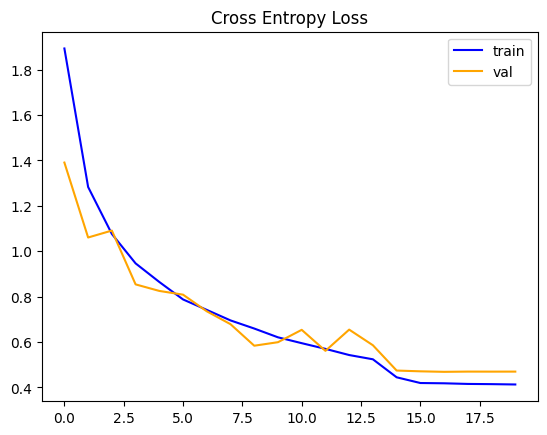

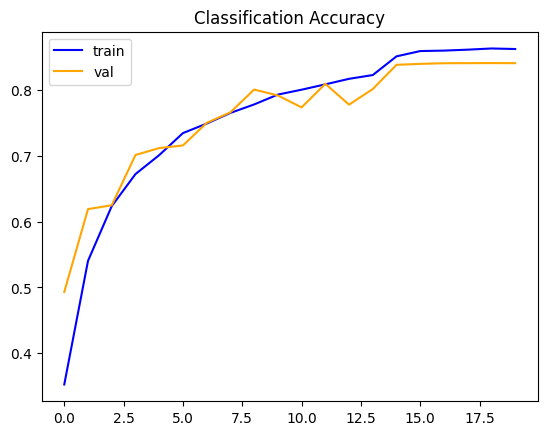

In [69]:
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='val')
plt.legend()
plt.show()

plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='val')
plt.legend()
plt.show()

This is the best model so far. We can see that the validation and train performance are so close and at the end they become stable. The This model is stable and with convolution layers starting from smaller to larger with dropouts become more for bigger convolutions and adding the learning scheduler we got to 83.6%.
We can see as th evalidation set touches the train it again goes up with few points were accuracy in validation set is less than test set. At the end they become stable.


Please see the last model with different augmentations in the second notebook.